# Introduction

In this project personality classifier model is developed from twitter tweets. The personality type indicator used is commonly used type indicator which is 16-MBTI( Myers Briggs Type Indicator). The BERT(Bidirectional Encoder Representations from Transformers) is also used to train model by fine tuning and adding the dense layer from the BERT classifier output by applying transfer leaning. As the datset was small in size data augmentation techniques were used to increase the amount of the dataset. The datset used for this project is at https://bitbucket.org/bplank/wassa2015/src/master/data/ .Please also note that during the whole model development  and evaluation I use **tweets** and **posts interchangeably** as both of them are social media data evenif the dataset is twitter tweets. 

BERT (Bidirectional Encoder Representations from Transformers) is a big neural network architecture, with a huge number of parameters, that can range from 100 million to over 300 million. So, training a BERT model from scratch on a small dataset would result in overfitting. Therefore using the pre-trained model is important to overcome this pitfall. 


Reasearchers argue that current techniques restrict the
power of the pre-trained representations, espe
cially for the fine-tuning approaches. The ma
jor limitation is that standard language models are
unidirectional, and this limits the choice of archi
tectures that can be used during pre-training.

Such restrictions are sub-optimal for sentence level tasks,and could be very harmful when applying fine tuning based approaches to token-level tasks such
as question answering, where it is crucial to incorporate context from both directions. BERT alleviates the previously mentioned unidi
rectionality constraint by using a “masked lan
guage model” (MLM) pre-training objective. The
masked language model randomly masks some of
the tokens from the input, and the objective is to
predict the original vocabulary id of the masked
word based only on its context. Unlike left-to-right language model pre-training, the MLM ob
jective enables the representation to fuse the left
and the right context, which allows us to pre-
train a deep bidirectional Transformer. In addi-
tion to the masked language model, we also use
a “next sentence prediction” task that jointly pre-
trains text-pair representations.

BERT offers an advantage over models like Word2Vec, because while each word has a fixed representation under Word2Vec regardless of the context within which the word appears, BERT produces word representations that are dynamically informed by the words around them. For example, given two sentences:

“The man was accused of robbing a bank.” “The man went fishing by the bank of the river.”

Word2Vec would produce the same word embedding for the word “bank” in both sentences, while under BERT the word embedding for “bank” would be different for each sentence. Aside from capturing obvious differences like polysemy, the context-informed word embeddings capture other forms of information that result in more accurate feature representations, which in turn results in better model performance.Ref:(https://arxiv.org/pdf/1810.04805.pdf)

**There are at least two reasons why BERT is a powerful language model:**
It is pre-trained on unlabeled data extracted from BooksCorpus, which has 800M words, and from Wikipedia, which has 2,500M words.
As the name suggests, it is pre-trained by utilizing the bidirectional nature of the encoder stacks. This means that BERT learns information from a sequence of words not only from left to right, but also from right to left.It is also important to note that the maximum size of tokens that can be fed into BERT model is 512. If the tokens in a sequence are less than 512, we can use padding to fill the unused token slots with [PAD] token. If the tokens in a sequence are longer than 512, then we need to do a truncation. And that’s all that BERT expects as input. BERT model then will output an embedding vector of size 768 in each of the tokens(if a sentence has 50 takens or words the full sentence has 50 vectors of each 768 size). We can use these vectors as an input for different kinds of NLP applications, whether it is text classification, next sentence prediction, Named-Entity-Recognition (NER), or question-answering.For a text classification task, we focus our attention on the embedding vector output from the special [CLS] token. This means that we’re going to use the embedding vector of size 768 from [CLS] token as an input for our classifier, which then will output a vector of size the number of classes in our classification task. Below is the illustration of the input and output of the BERT model.


example_text = 'I will watch Memento tonight'
bert_input = tokenizer(example_text,padding='max_length', max_length = 10, 
                       truncation=True, return_tensors="pt")


print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])
>>>tensor([[  101,   146,  1209,  2824,  2508, 26173,  3568,   102,     0,     0]])
>>>tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
>>>tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])

1. The first row is input_ids , which is the id representation of each token. We can actually decode these input ids into the actual tokens as follows:
As you can see, the BertTokenizer takes care of all of the necessary transformations of the input text such that it’s ready to be used as an input for our BERT model. It adds [CLS], [SEP], and [PAD] tokens automatically. Since we specified the maximum length to be 10, then there are only two [PAD] tokens at the end.
2. The second row is token_type_ids , which is a binary mask that identifies in which sequence a token belongs. If we only have a single sequence, then all of the token type ids will be 0. For a text classification task, token_type_ids is an optional input for our BERT model.
3. The third row is attention_mask , which is a binary mask that identifies whether a token is a real word or just padding. If the token contains [CLS], [SEP], or any real word, then the mask would be 1. Meanwhile, if the token is just padding or [PAD], then the mask would be 0.
As you might notice, we use a pre-trained BertTokenizer from bert-base-cased model. This pre-trained tokenizer works well if the text in your dataset is in English. ref[ https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f ] The following pictures show some structures of BERT archtecture and stages of computation which are taken from different sources.

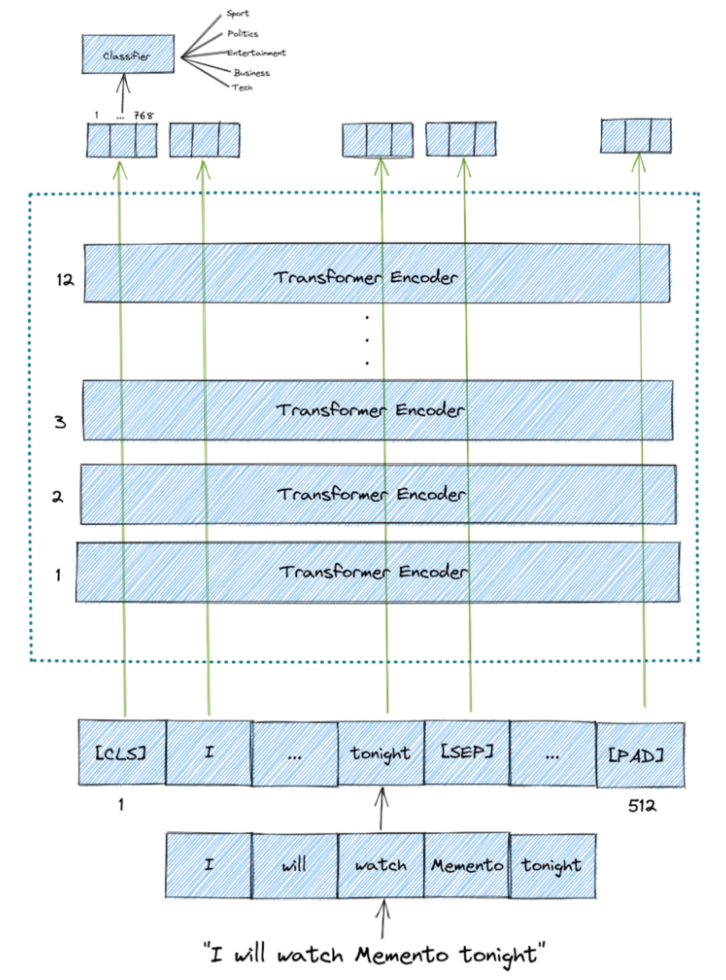

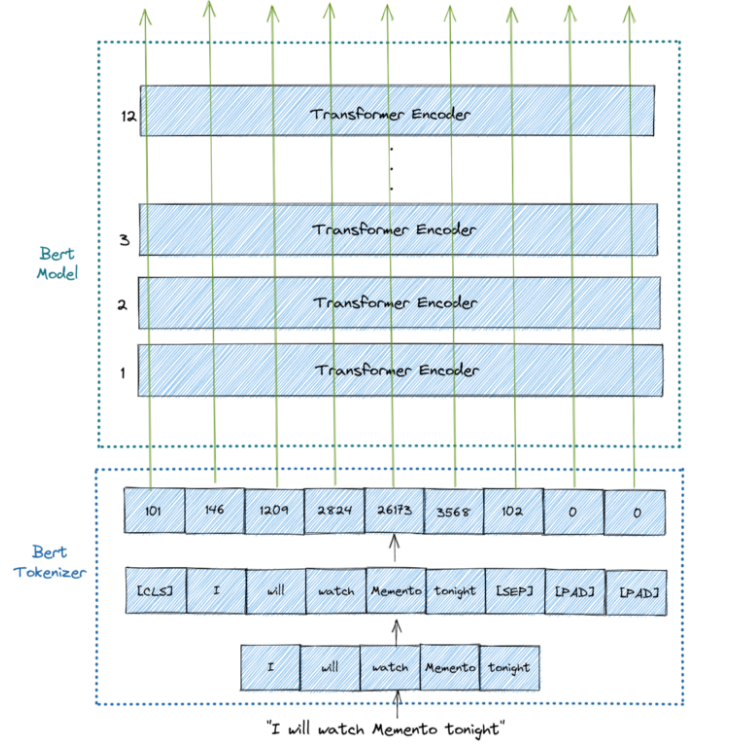

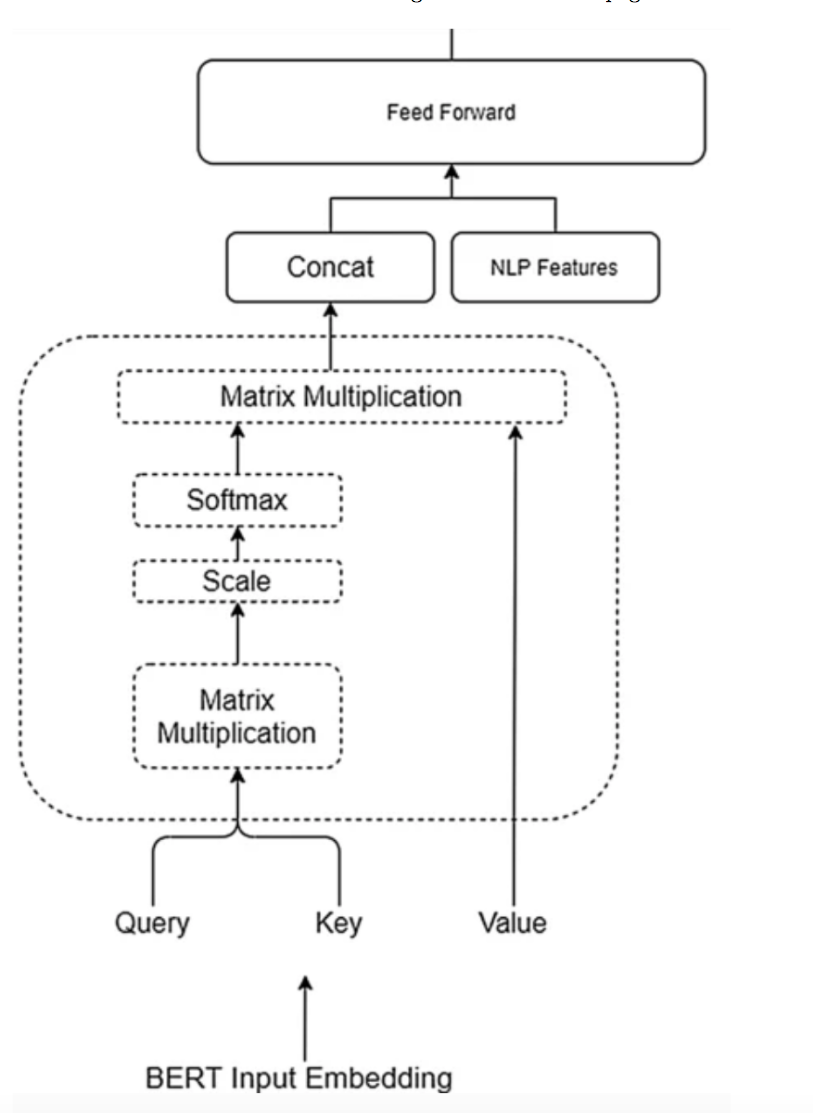

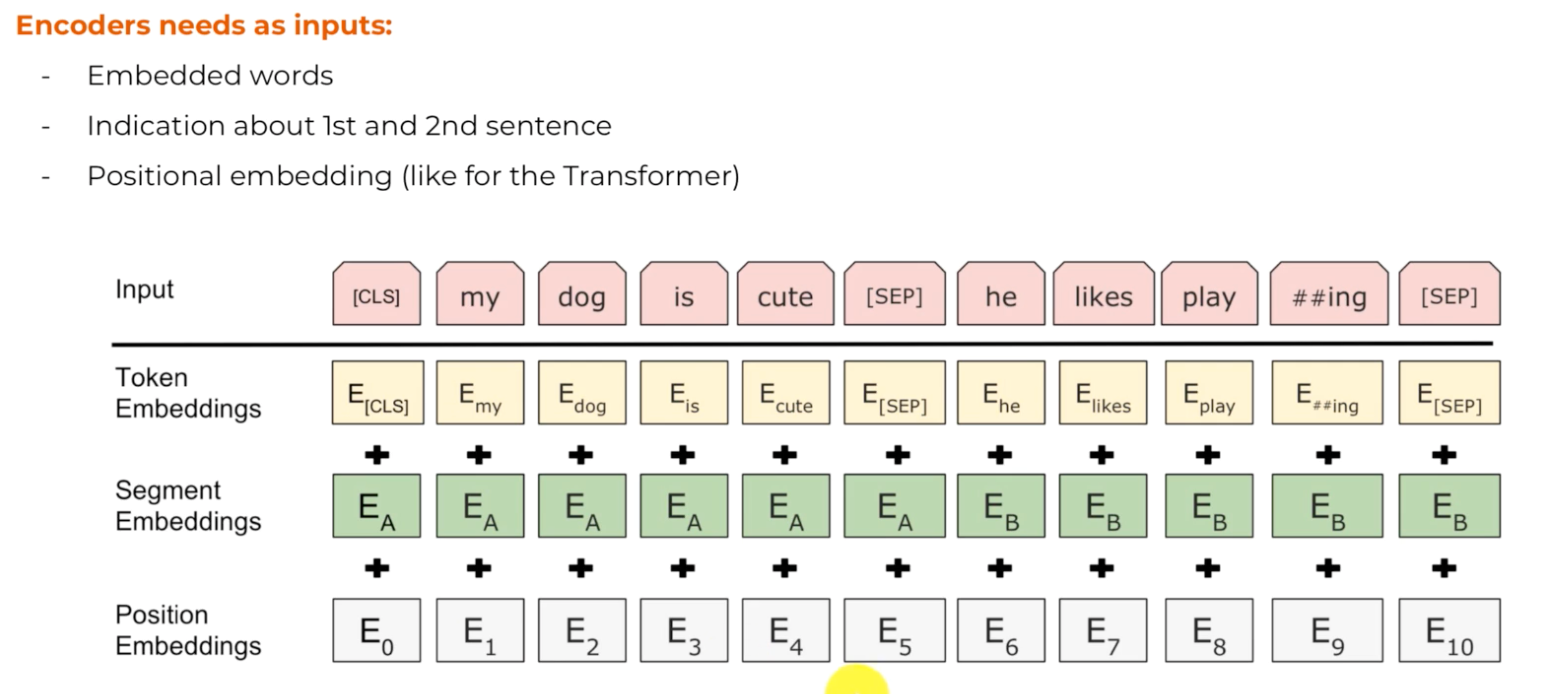

Model Overview

BERT’s model architecture is based on Transformers. It uses multilayer bidirectional transformer encoders for language representations. Based on the depth of the model architecture, two types of BERT models are introduced namely BERTBase and BERTLarge. The BERTBase model uses 12 layers of transformers block with a hidden size of 768 and number of self-attention heads as 12 and has around 110M trainable parameters. On the other hand, BERTLarge uses 24 layers of transformers block with a hidden size of 1024 and number of self-attention heads as 16 and has around 340M trainable parameters. BERT uses the same model architecture for all the tasks be it NLI, classification, or Question-Answering with minimal change such as adding an output layer for classification. Input-Output Format

The whole input to the BERT has to be given a single sequence. BERT uses special tokens [CLS] and [SEP] to understand input properly. [SEP] token has to be inserted at the end of a single input. When a task requires more than one input such as NLI and Q-A tasks, [SEP] token helps the model to understand the end of one input and the start of another input in the same sequence input. [CLS] is a special classification token and the last hidden state of BERT corresponding to this token (h[CLS]) is used for classification tasks. BERT uses Wordpiece embeddings input for tokens. Along with token embeddings, BERT uses positional embeddings and segment embeddings for each token. Positional embeddings contain information about the position of tokens in sequence. Segment embeddings help when model input has sentence pairs. Tokens of the first sentence will have a pre-defined embedding of 0 whereas tokens of the second sentence will have a pre-defined embedding of 1 as segment embeddings. BERT Input-Output Format.


Ref: https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-bert/

Final Embeddings used by model architecture are the sum of token embedding, positional embedding as well as segment embedding. The final embeddings are then fed into the deep bidirectional layers to get output. The output of the BERT is the hidden state vector of pre-defined hidden size corresponding to each token in the input sequence.

if you give any sentence sentence to BertModel you will get 768 dimension embedding for each token in the given sentence. So 'sequence output' will give output of dimension [1, 8, 768] since there are 8 tokens including [CLS] and [SEP] and 'pooled output' will give output of dimension [1, 1, 768] which is the embedding of [CLS] token.

In general people use 'pooled output' of the sentence and use it for text classification (or for any other specific task).



**Check if TPU is available**

In [ ]:
"""
#Check if TPU is available
import tensorflow as tf
use_tpu = True
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.MirroredStrategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)
"""

This project takes about 8 to 12 hours using GPU

# 1. Install and Import Libraries

**1. Install and Import Libraries**

In [ ]:
!pip install transformers #install transformers

     |████████████████████████████████| 3.8 MB 12.7 MB/s 
     |████████████████████████████████| 596 kB 77.9 MB/s 
     |████████████████████████████████| 6.5 MB 72.6 MB/s 
     |████████████████████████████████| 67 kB 4.9 MB/s 
     |████████████████████████████████| 895 kB 74.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install tensorflow_hub #import tensor flow hub 
!pip install keras tf-models-official pydot graphviz # import tf-model official 

     |████████████████████████████████| 2.2 MB 14.9 MB/s 
     |████████████████████████████████| 237 kB 71.6 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 636 kB 57.2 MB/s 
     |████████████████████████████████| 90 kB 10.5 MB/s 
     |████████████████████████████████| 47.8 MB 63.8 MB/s 
     |████████████████████████████████| 1.2 MB 60.0 MB/s 
     |████████████████████████████████| 4.9 MB 50.6 MB/s 
     |████████████████████████████████| 99 kB 10.7 MB/s 
     |████████████████████████████████| 1.1 MB 71.5 MB/s 
     |████████████████████████████████| 352 kB 48.6 MB/s 
     |████████████████████████████████| 462 kB 88.1 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=6adb144dffeb50926f22d2b7ceb1e4cbe79fe130e340b8588027efb4c3cc6a17
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for seqeval: filename=seqe

Install  nlpaug for NLP augmentation

In [ ]:
# install augmentation libraries
!pip install nlpaug # install nlpaug
#            .augmentation libraries
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf
from nlpaug.util import Action


     |████████████████████████████████| 410 kB 14.4 MB/s 


In [ ]:
#@title Libraries { form-width: "200px" }
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import logging
from numpy.random import RandomState
import os
assert tf.__version__.startswith('2')
tf.get_logger().setLevel('ERROR')
# Data Analysis
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
# augmentation libraries


# Model training and evaluation
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
# bert from tfhub
# import official.nlp.bert.bert_models
import official.nlp.bert.configs
# import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization as tokenization


from official.modeling import tf_utils
from official import nlp
from official.nlp import bert

from tqdm.notebook import tqdm
import tensorflow.keras
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import regex as re
from keras import backend as K
# import plotly.express as px


#Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import keras
import keras.utils
from keras import utils as utils

# word2vec 
import gensim.models 
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from gensim.models import Word2Vec
# Cell
import os
import time
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as precision_recall_fscore_support

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.INFO)

# 2 Mount Drive

In [ ]:
#mount google drive to fetch files
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# 3 Tweets: Personality type classification by BERT

## 3.1 load and visualize tweets dataset

In [ ]:
# data path of the dataset
personality_from_tweets_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/orginal_tweets_dataset/personality_from_tweets.csv'

In [ ]:
# read dataset as dataframe
personality_from_tweets_df =  pd.read_csv(personality_from_tweets_path)

In [ ]:
# data_set shape and size
personality_from_tweets_df.shape

(1500, 2)

In [ ]:
#@title Check if null { form-width: "200px" }
# check for null values
print(personality_from_tweets_df ['type'].isnull().sum())
personality_from_tweets_df['posts'].isnull().sum()  # no null values.

0


0

**Visualize data distribution for each class type or personality type**

(1500, 2)


type                                              posts
0  ENFJ  \tf\t998\t@USER @USER @USER would be great or ...
1  ENFJ  \tf\t998\tsay what ? this weekend has been ful...
2  ENFJ  \tm\t1000\tdaaamn ru was so mad .... @URL / cv...
3  ENFJ  \tf\t999\tin all , i may have slept an uninter...
4  ENFJ  \tf\t100\tthat tumblr post comparing louis ' l...

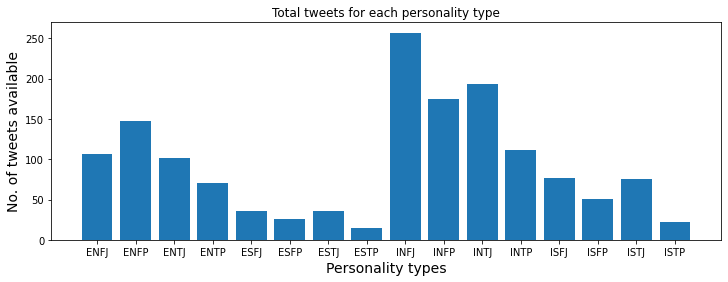

In [ ]:
#@title Visualize data distribution { form-width: "200px" }
""" This shows the distribution of the dataset for each class bar chart"""
total = personality_from_tweets_df.groupby(['type']).count()
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of tweets available', size = 14)
plt.title('Total tweets for each personality type')
print(personality_from_tweets_df.shape)
personality_from_tweets_df.head()

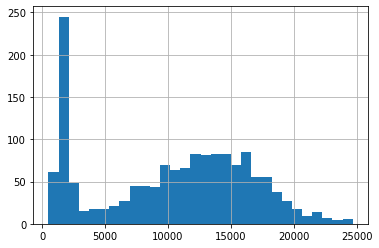

In [ ]:
# get length of all the tweets in terms of number of words in each sentence  in the df
seq_len = [len(i.split()) for i in personality_from_tweets_df.posts.values]

pd.Series(seq_len).hist(bins = 30)

## 3.2. Tweets data processing

### 3.2.1 Data cleaning 

In [ ]:
#@title func clean text { form-width: "200px" }
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()     # make lower case rach letter
    text =re.sub(r'http\S+', '', text)                 
    text = re.sub("@[A-Za-z0-9_]+","", text) #remove @user and @url
    text = re.sub("#[A-Za-z0-9_]+","", text) #remove #hashtag
    text = re.sub('\[.*?\]', '', text)       #remove punctuation 
    text = re.sub('[ \t]+' , ' ', text)
    text = " ".join(text.split())            #remove spaces 
    text = re.sub('[^0-9a-z]',' ',text)      #remove non alphaneumeric
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove the links
    text = re.sub('<.*?>+', '', text)
    text =  ' '.join([word for word in text.split() if word not in STOPWORDS]) # delete stopwords from text
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text[2:]                          #remove the first two words age and number of follower 
    text = re.sub('\s+', ' ', text)          #remove extra space
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# sample text to test the cleaner function
test="https://www.google.com/search?client=firefox-b-d&q=how+to+use+tensor+board+for+functional+keras+model+to+hyperparameters.www.google.com/search?client=firefox-b-d&q=how+to+use+tensor+board+for+functional+keras+model+to+hyperparameters 1 2 try if the data processing and cleaning works ?? strated the importance of transfer learning from large pre-trained models, where an effective recipe £$%$. "
clean_text(test)

'try data processing cleaning works strated importance transfer learning large pre trained models effective recipe'

In [ ]:
#@title check to n posts { form-width: "200px" }
for tweet in personality_from_tweets_df['posts'][:2]:
   
    print(tweet+'\n'+'\n')
    print(clean_text(tweet)+'\n'+'\n')


	f	998	@USER @USER @USER would be great or @USER or law students for repro justice could be great fits in an airport and deeply sad i'm not able to be standing with protesters in nyc . sending every iota of … @URL / pbtdwbb 9ez justice department to open civil rights investigation in eric garner case — rt usa @URL / rs0hvnnheq @HASHTAG @HASHTAG @USER mine too , it was so beneath human dignity how they treated him . his family deserves justice . we all do . members of congress do “ hands up ! ” gesture in protset on house floor | global grind @URL / qaaari 0br7 cop charged with sexually assaulting 7 black women released from jail @URL / sg8gncwwbs via @USER age 20 i was harassed by cops at a bar when i wasn't drinking while some white friends drinking w fake ids were left alone @HASHTAG watched my dad get stopped without cause by cops for driving a " nice car " when i was a child . @HASHTAG reported a rape threat and death threat to nypd and the cops who came were nonchalant @HASHTAG st

In [ ]:
#@title data frame after clean and remove stop words { form-width: "200px" }
# clean and remove stop words from posts
"""dataset name :personality_from_tweets_df"""
personality_from_tweets_df_new=personality_from_tweets_df
personality_from_tweets_df_new['clean_posts'] = personality_from_tweets_df_new['posts'].apply(str).apply(lambda x: clean_text(x))



(1500, 3)


type                                              posts  \
0  ENFJ  \tf\t998\t@USER @USER @USER would be great or ...   
1  ENFJ  \tf\t998\tsay what ? this weekend has been ful...   
2  ENFJ  \tm\t1000\tdaaamn ru was so mad .... @URL / cv...   
3  ENFJ  \tf\t999\tin all , i may have slept an uninter...   
4  ENFJ  \tf\t100\tthat tumblr post comparing louis ' l...   

                                         clean_posts  
0   would great law students repro justice could ...  
1   say weekend full surprises like package ahh i...  
2  aaamn ru mad dammit pearl get together knwo ri...  
3   may slept uninterrupted minutes last night pr...  
4   tumblr post comparing louis laugh goat rt new...

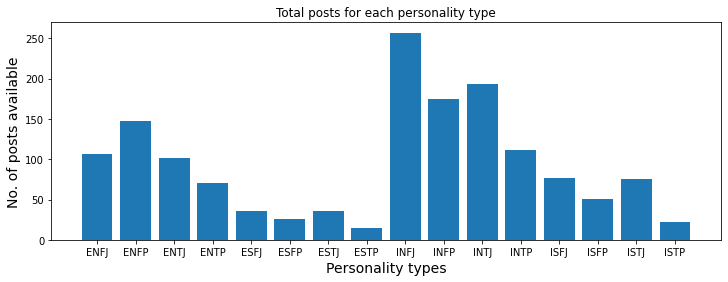

In [ ]:
#@title personality from tweets data distribution bar graph { form-width: "200px" }
""" This shows the distribution of the dataset for each class bar chart"""
total = personality_from_tweets_df_new.groupby(['type']).count()
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')
print(personality_from_tweets_df_new.shape)
personality_from_tweets_df_new.head()

In [ ]:
# encoding 
#@title label encoding of dataset { form-width: "200px" }
# Converting MBTI personality type into numerical form using Label Encoding
# encoding personality type
enc = LabelEncoder()
personality_from_tweets_df['type_encoding'] = enc.fit_transform(personality_from_tweets_df['type'])

In [ ]:
# shuffle
#@title shuffling dataset { form-width: "200px" }
#shuffle dataset 
from sklearn.utils import shuffle
personality_from_tweets_df = shuffle(personality_from_tweets_df,random_state=1000000)

In [ ]:
# save data
# path
personality_from_tweets_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/processed_tweets_with_all_columns.csv'
# save
personality_from_tweets_df.to_csv(personality_from_tweets_df_path,index=False)

print(personality_from_tweets_df.shape)
personality_from_tweets_df.head()

(1500, 4)


type  ... type_encoding
1310  ISFP  ...            13
923   INFP  ...             9
466   ESFP  ...             5
1469  INTJ  ...            10
337   ENTJ  ...             2

[5 rows x 4 columns]

In [ ]:
# load data
# path
personality_from_tweets_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/processed_tweets_with_all_columns.csv'
personality_from_tweets_df=pd.read_csv(personality_from_tweets_df_path)

In [ ]:
#@title remove extra columns { form-width: "200px" }
# save the clean_posts column to posts column 
personality_from_tweets_df['posts'] = personality_from_tweets_df['clean_posts'].apply(str).apply(lambda x: x)

# dropping useless features/columns
personality_from_tweets_df.drop(labels=['clean_posts'], axis=1, inplace=True)


# save before split
# path
personality_from_tweets_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/processed_tweets.csv'

# save
personality_from_tweets_df.to_csv(personality_from_tweets_df_path,index=False)

(1500, 3)


type                                              posts  type_encoding
0  ISFP   rt well fucked chem hahahaha feel like strugg...             13
1  INFP   shea name kids kids counting like dr phil mak...              9
2  ESFP  enos quejarse que aqu se est peor became mayor...              5
3  INTJ   eventually gonna need either kitten baby some...             10
4  ENTJ  ick written eh oldie goodie college radio dj i...              2

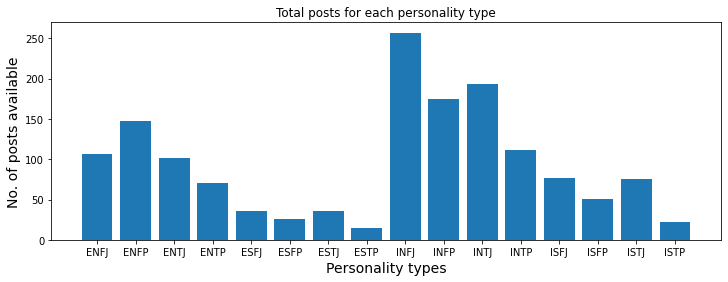

In [ ]:
#@title personality from tweets data distribution bar graph { form-width: "200px" }
""" This shows the distribution of the dataset for each class bar chart"""
total = personality_from_tweets_df.groupby(['type']).count()
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')
print(personality_from_tweets_df.shape)
personality_from_tweets_df.head()

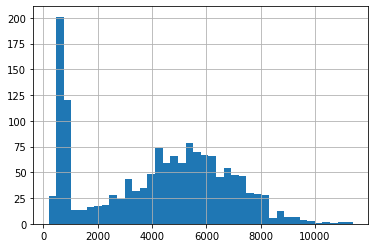

In [ ]:
#@title show the words length of train for a sentence { form-width: "200px" }
#  get length of all the messages in the train set
seq_len = [len(i.split()) for i in personality_from_tweets_df.posts.values]

pd.Series(seq_len).hist(bins = 40)

### 3.2.2 Adjust length of input sequence

In [ ]:
# load the processed tweets
personality_from_tweets_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/processed_tweets.csv'
# load
personality_from_tweets_df=pd.read_csv(personality_from_tweets_df_path)

Bert maximum sequence or input or sentence length has to be 512.

In [ ]:
#@title func Adjust sequence length to n and add the rest as new sample (eg 510 as CLC+ 510+ SEP=512) { form-width: "100px", display-mode: "both" }
def adjust_sequence_length_n(data, n):
    # from tqdm import tqdm_notebook as tqdm
    # tqdm().pandas()
    empty_data = []
    df = pd.DataFrame(empty_data, columns = ['type', 'posts', 'type_encoding'])
    for sentence,p_type, p_type_encoding in zip(data.posts,data.type,data.type_encoding):
        word_list=sentence.split()
        length_word_list=len(word_list)
        length_word_list_per_sentences=int(length_word_list/n)
        length_word_list_per_sentences=length_word_list_per_sentences+1
        
        for i in range(length_word_list_per_sentences):
          # start from i+i*n 
          fro_m=(i+i*n)  #0,   513,  1026 ...
          # to (i+1)*(n+1)
          to=((i+1)*(n+1)) #513, 1026, 1539 ...
          # join sentences from :to
          section=" ".join(word_list[fro_m:to])
          # section=" ".join(word_list[0:n-1])
          if(len(section)<=100):
            continue
          else:
            df = df.append({'type': p_type, 'posts': section, 'type_encoding':p_type_encoding}, ignore_index=True)
        # print(length_word_list_per_sentences, " =ength_word_list_per_sentences")
        # print(p_type, "  ends")

    return df
    

In [ ]:
#@title func Adjust sequence length to n and drop the rest (eg 500 as CLC+ SEP) { form-width: "100px", display-mode: "both" }
def adjust_sequence_length_only_upto_n(data, n):
    # from tqdm import tqdm_notebook as tqdm
    # tqdm().pandas()
    empty_data = []
    df = pd.DataFrame(empty_data, columns = ['type', 'posts', 'type_encoding'])
    for sentence,p_type, p_type_encoding in zip(data.posts,data.type,data.type_encoding):
        word_list=sentence.split()
        length_word_list=len(word_list)
        length_word_list_per_sentences=int(length_word_list/n)
        length_word_list_per_sentences=length_word_list_per_sentences+1
        
        fro_m=0  #0
        # to (i+1)*(n+1)
        to=n #513, 1026, 1539 ...
        # join sentences from :to
        section=" ".join(word_list[fro_m:to])
        df = df.append({'type': p_type, 'posts': section, 'type_encoding':p_type_encoding}, ignore_index=True)

    return df

In [ ]:
#@title Adjust sequence length of processed data { form-width: "200px" }
sequence_length=510 ## can vary
personality_from_tweets_df=adjust_sequence_length_n(personality_from_tweets_df,sequence_length) 
personality_from_tweets_df.shape

(13144, 3)

In [ ]:
sequence_length=510 

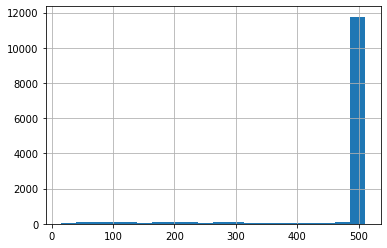

In [ ]:
#@title show the words length  for a sentence { form-width: "200px" }
#  get length of all the messages in the train set
seq_len = [len(i.split()) for i in personality_from_tweets_df.posts.values]

pd.Series(seq_len).hist(bins = 20)

In [ ]:
#@title Shuffle data { form-width: "200px" }
from sklearn.utils import shuffle
personality_from_tweets_df = shuffle(personality_from_tweets_df,random_state=1000000)

In [ ]:
#@title Save input sequence adjusted data { form-width: "200px" }
# save 

personality_from_tweets_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/adjusted_processed_tweets_'+str(sequence_length)+'sequence_length.csv'
personality_from_tweets_df.to_csv(personality_from_tweets_df_path,index=False)

In [ ]:
#@title Load the input sequence  adjusted data { form-width: "200px" }
# load
personality_from_tweets_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/adjusted_processed_tweets_'+str(sequence_length)+'sequence_length.csv'

personality_from_tweets_df=pd.read_csv(personality_from_tweets_df_path)

(13144, 3)


type                                              posts  type_encoding
0  ENTJ  ra tomorrow fjaqjhu saw video thoughts x facto...              2
1  ENFJ  week thursday adding segment cover mikulski ne...              0
2  ENFP  seems beautiful true mcgksftobx via ur underst...              1
3  ENFJ  count perceive facts opinions anyway studio ho...              0
4  INFJ  hey wake person feel like intelligent person f...              8

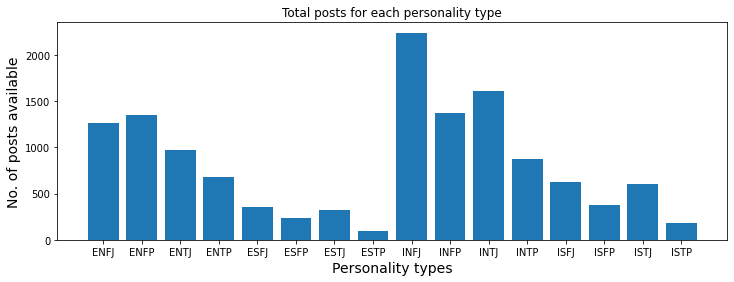

In [ ]:
#@title personality from tweets data distribution bar graph after length of sequence adjusted{ form-width: "200px" }
""" This shows the distribution of the dataset for each class bar chart"""
total = personality_from_tweets_df.groupby(['type']).count()
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')
print(personality_from_tweets_df.shape)
personality_from_tweets_df.head()

### 3.2.3 Train Validation and Test Split

In [ ]:
sequence_length=512
#@title Load the input sequence  adjusted data { form-width: "200px" }
# load
personality_from_tweets_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/adjusted_processed_tweets_'+str(sequence_length)+'sequence_length.csv'

personality_from_tweets_df=pd.read_csv(personality_from_tweets_df_path)

In [ ]:
#@title split to train validation and test data { form-width: "200px" }
# split the dataset df to train, val and test 
"""dataset name :personality_from_tweets_df"""
np.random.seed(100)
train_df, val_df, test_df = np.split(personality_from_tweets_df.sample(frac=1, random_state=42), 
                                     [int(0.6*len(personality_from_tweets_df)), int(0.8*len(personality_from_tweets_df))])

print(train_df.shape,val_df.shape, test_df.shape)

(7886, 3) (2629, 3) (2629, 3)


save and load data

In [ ]:
#@title saving and loading path { form-width: "200px" }
# path
train_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/unaug_train_tweets.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/validation_tweets.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/test_tweets.csv'
# save after split
# save
train_df.to_csv(train_df_path,index=False)
val_df.to_csv(val_df_path,index=False)
test_df.to_csv(test_df_path,index=False)

In [ ]:
#@title load after split { form-width: "200px" }
# load the splited value
train_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/unaug_train_tweets.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/validation_tweets.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/test_tweets.csv'
# load
train_df=pd.read_csv(train_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)
print(train_df.shape, val_df.shape,test_df.shape)

(30327, 3) (10109, 3) (10110, 3)


In [ ]:
#@title Check if null { form-width: "200px" }
# check for null values
print(train_df ['type'].isnull().sum())
print(train_df['posts'].isnull().sum())  # no null values.
print(train_df ['type_encoding'].isnull().sum())

0
0
0


(7886, 3)


type                                              posts  type_encoding
7881  INFJ  ice cream greatest love got home work went str...              8
7882  INFP  hesp brunch two days porkapolooza two days por...              9
7883  ISTP  already making mockery judicial nkc set de fot...             15
7884  INTJ  donated scholarship fund game changer may grad...             10
7885  ISFJ  mckinnon truly iconic justin bieber used dog e...             12

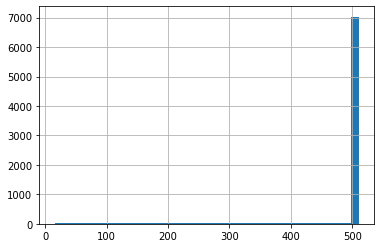

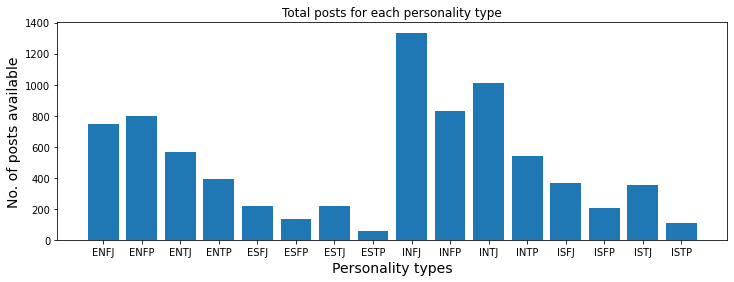

In [ ]:
#@title train data distribution bar graph { form-width: "200px" }
""" This shows the distribution of the dataset for each class bar chart"""
#  get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_df.posts.values]

pd.Series(seq_len).hist(bins = 40)

total = train_df.groupby(['type']).count()
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')
print(train_df.shape)
train_df.tail()



(2629, 3)


type                                              posts  type_encoding
0  INFJ  voices bear pretty fun come see bear tomorrow ...              8
1  INTJ  mayor london never gonna look brits way fact s...             10
2  INTP  tht please dont love dad phil much want die he...             11
3  ESFP  via watched birdman fucking awesome want see i...              5
4  ENTJ  people digital mediahttp co xtajsmvm watch hel...              2

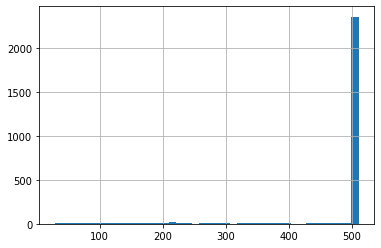

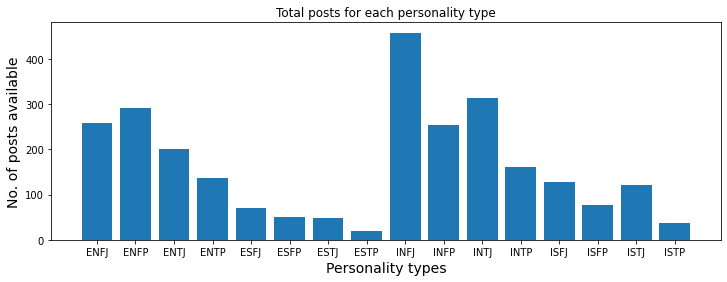

In [ ]:
#@title val data distribution bar graph { form-width: "200px" }
#  get length of all the messages in the train set
seq_len = [len(i.split()) for i in val_df.posts.values]

pd.Series(seq_len).hist(bins = 40)
""" This shows the distribution of the dataset for each class bar chart"""
total = val_df.groupby(['type']).count()
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')
print(val_df.shape)
val_df.head()

(2629, 3)


type                                              posts  type_encoding
2624  ENFP  b spending entire day together tomorrow gonna ...              1
2625  INTP  update india december maybe qbl became lot eas...             11
2626  ISFP  mean swahili u b cat sings every night cold ha...             13
2627  ENTP  tweets wanted shit bang pandora played sweetes...              3
2628  INFP  probably going prodigies bad english hahahaha ...              9

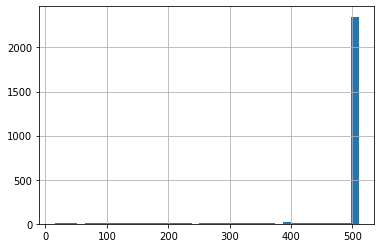

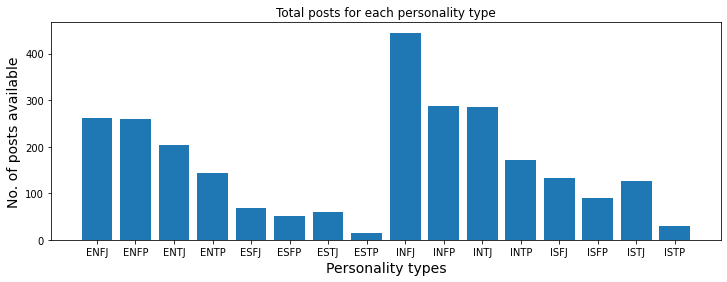

In [ ]:
#@title test data distribution bar graph { form-width: "200px" }
""" This shows the distribution of the dataset for each class bar chart"""
#  get length of all the messages in the train set
seq_len = [len(i.split()) for i in test_df.posts.values]

pd.Series(seq_len).hist(bins = 40)
total = test_df.groupby(['type']).count()
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')
print(test_df.shape)
test_df.tail()

### 3.2.4 Data Augmentation

#### 3.2.4.1 About data augmentation

Introduction 

In contrast to Computer Vision, where image data augmentation is common, text data augmentation in NLP is uncommon.Data Augmentation describes applying transformations to our original labeled examples to construct new data for the training set. This simply means we want to generate more data and more examples from our current dataset. So what it means is, let’s say you have data (X, Y), where X is a sentence and Y is its corresponding label. So, we can imagine it to be like X is a movie review and Y is the sentiment associated with that review.

As a part of data augmentation, we transform this X and create X’ out of it, while still preserving the label Y.

(X, Y) ——T——> (X’, Y)

So, as you can see since Y is still preserved, which means the transformation that we want to apply, say, T, has to be semantically invariant which means it doesn’t change the meaning of the original sentence. So, X’ could be syntactically a little different compared to X, but semantically it should mean the same thing.

People have been researching to come up with different data augmentation techniques to answer this question – “How do you define T efficiently so that X’ is diverse enough, yet semantic coherent so that the model becomes robust and generalizes well on the unseen data?” NLPAug is a python library for textual augmentation in machine learning experiments. The goal is to improve deep learning model performance by generating textual data. It is also able to generate adversarial examples to prevent adversarial attacks. NLPAug is a tool that assists you in enhancing NLP for machine learning applications. Let’s look at how we can utilize this library to enrich data.

NLPAug provides three different types of augmentation:

    Character level augmentation
    Word level augmentation
    Flow/ Sentence level augmentation

We’ll look into these three basic elements in the next section.

This NLPAug module is specially designed for Natural Language Processing. You can install it by using this command:
pip install nlpaug]


Ref1:https://www.analyticsvidhya.com/blog/2021/08/nlpaug-a-python-library-to-augment-your-text-data/
Ref2:https://github.com/makcedward/nlpaug/blob/bb2fc63349bf949f6f6047ff447a0efb16983c0a/example/textual_augmenter.ipynb

#### 3.2.4.2 Tweets dataset augmentation

##### 3.2.4.2.1 Augmentation steps

In [ ]:
# path
train_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/unaug_train_tweets.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/validation_tweets.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/test_tweets.csv'
# load
train_df=pd.read_csv(train_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# download nltk wordnet for finding sysnonym
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# synonym augmentation function 
synonymAug = naw.SynonymAug(aug_src='wordnet', model_path=None, name='Synonym_Aug', aug_min=1, aug_max=200, aug_p=0.4, lang='eng', 
                     stopwords=None, tokenizer=None, reverse_tokenizer=None, stopwords_regex=None, force_reload=False, 
                     verbose=0)


In [ ]:

TOPK=5 #default=100
ACT =  'substitute' #'insert'
 
aug_bert = naw.ContextualWordEmbsAug(
    model_path='distilbert-base-uncased', 
    #device='cuda',
    action=ACT, top_k=TOPK, aug_p=0.4,aug_min=2,aug_max=200)

In [ ]:

# synonym based text augmentation wordnet

# orginal text
original_text='Data Augmentation describes applying transformations to our original labeled examples to construct new data for the training set'
# augmented text 
augmented_text = synonymAug.augment(original_text)
print("Original Text: ",original_text)
print("Augmented text: ",augmented_text)


Original Text:  Data Augmentation describes applying transformations to our original labeled examples to construct new data for the training set
Augmented text:  Data Augmentation describes put on transformation to our original labeled example to construct novel information for the preparation set


In [ ]:

# bert based text augmentation

# orginal text
original_text='Data Augmentation describes applying transformations to our original labeled examples to construct new data for the training set'
# augmented text 
augmented_text = aug_bert.augment(original_text)
print("Original Text: ",original_text)
print("Augmented text: ",augmented_text)

Original Text:  Data Augmentation describes applying transformations to our original labeled examples to construct new data for the training set
Augmented text:  data augmentation describes applying transformations to modify randomly labeled variables to generate corresponding values in each training set


In [ ]:
#@title func Augmentation { form-width: "200px" }
def augment_dataset(df,n,type_list):
  # sysnonym augmentation technique
    # aug = naw.SynonymAug(aug_src='wordnet')
    # for each personality type in the type list augment each sent
    for l in range(0, len(type_list)):

      # single type
      pType=type_list[l]
      print("Personality type "+pType+" starts.....")

      ##selecting the data frame of the type
      df_n=df[df.type==pType].reset_index(drop=True)
      pType_encoding=df_n.type_encoding.values[0]
      # for sentence,p_type, p_type_encoding in zip(data.posts,data.type,data.type_encoding)

      # type_encoding=df_n.type_encoding
      # amount or number of rows  of this dataframe 
      len_df_n=len(df_n)
      # if the amount is greater than 2/3 of the required amount do nothing
      # example if  n=150 and len_df_n=101,2/3*150=100 so don't touch
      if(len_df_n>(2/3)*n):
          continue
      #added samples is the difference between required and the existing amount
      samples=n-len_df_n
      # if the difference is greater than the existing, augment by the (diiference/existing amount=k)times (e.g 150-50=100, k=100//50=2)
      if(samples>=len_df_n):
          # augmenting factor
          k= (samples//len_df_n)
          for j in range(k):
            # consider the existing amount as sample to be added
              samples=len_df_n
              # for a length of this added samples , take added samples amount from the whole data frame of this one particular type(e.g INTP)
              for i in tqdm(np.random.randint(0,len(df_n),samples)):
                  new_text=[]
                  # extract texts
                  text = df_n.iloc[i]['posts']
                  # augment one sentence or text
                  augmented_text=synonymAug.augment(text)

                  # add this sentence as new sentence
                  new_text.append(augmented_text)
                  
                  
                  ## add it to the new df
                  new=pd.DataFrame({'posts':new_text,'type':pType,'type_encoding':pType_encoding})
                  # add this new df to the end of the existing df
                  df=df.append(new)
      # if the difference is not greater  than the existing, augment only once (e.g 150-80=70)
      else:
          # for a length of this added samples(the difference between required and the existing amount) , take added samples amount from the whole data frame of this one particular type(e.g INTP)
          for i in tqdm(np.random.randint(0,len(df_n),samples)):
              # for i in range(0,len(df_n)):
              new_text=[]
              # extract texts
              text = df_n.iloc[i]['posts']

              # augment one sentence or text
              augmented_text=synonymAug.augment(text)
              # add this sentence as new sentence
              new_text.append(augmented_text)
              
              
              ## add it to the new df
              new=pd.DataFrame({'posts':new_text,'type':pType,'type_encoding':pType_encoding})
              # add this new df to the end of the existing df
              df=df.append(new)
      print("Personality type "+pType+" ends")

        
    return df

In [ ]:
def augment_ds(df, n):
    #@title func augment train validation and test data individually { form-width: "200px" }
    """dataset name :personality_from_tweets_df"""
    type_list=["ISTJ","ISTP","ISFJ","ISFP","INFJ","INFP","INTJ","INTP","ESTP","ESTJ","ESFP","ESFJ","ENFP","ENFJ","ENTP","ENTJ"]
    number_of_train_samples_required=n
    train_df=augment_dataset(df,number_of_train_samples_required,type_list)
    # path
    aug_train_tweet_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_train_processed_tweets2.csv'

    #save
    train_df.to_csv(aug_train_tweet_df_path,index=False)
    return train_df

##### 3.2.4.2.2 Augmentation results

In [ ]:
# augment the dataset. if it is before split is going to be the whole data if it is after split and we want to augment only the trainin set it is going to be the traiining set
aug_train_tweets_df=augment_ds(train_df,1500)

In [ ]:
aug_train_tweet_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_train_processed_tweets.csv'

train_df=pd.read_csv(aug_train_tweet_df_path)

(23158, 3)


type                                              posts  type_encoding
18764  ESTJ  watching quick fixes cwzomrml hsbc pay foreclo...              6
21924  ESFJ  oo nga ako parin yun hehehehehe stay eto ba yu...              4
9801   INFP  everything fresh way approach dull dangerous t...              9
5117   ISTJ  ass suits see mind fucking brain like dokyun n...             14
14036  ISTP  dumb hell like really hope school knows suicid...             15

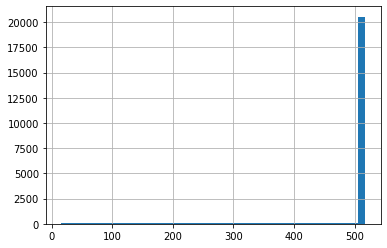

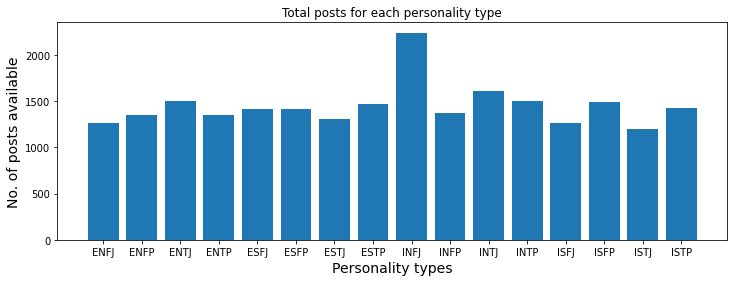

In [ ]:
""" This shows the distribution of the dataset for each class bar chart"""
#  get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_df.posts.values]

pd.Series(seq_len).hist(bins = 40)

total = train_df.groupby(['type']).count()
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')
print(train_df.shape)
train_df.tail()

In [ ]:
from sklearn.utils import shuffle
train_df = shuffle(train_df,random_state=1000000000)

In [ ]:
aug_train_tweet_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_train_processed_tweets.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/validation_tweets.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/test_tweets.csv'
#load
train_df=pd.read_csv(aug_train_tweet_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)
print(train_df.shape, val_df.shape, test_df.shape)

(21547, 3) (2629, 3) (2629, 3)


In [ ]:
# check if there are null values
print(train_df ['type_encoding'].isnull().sum())
print(val_df ['type_encoding'].isnull().sum())
print(test_df ['type_encoding'].isnull().sum())
print(train_df ['type'].isnull().sum())
print(val_df ['type'].isnull().sum())
print(test_df ['type'].isnull().sum())
print(train_df ['posts'].isnull().sum())
print(val_df ['posts'].isnull().sum())
print(test_df ['posts'].isnull().sum())

0
0
0
0
0
0
0
0
0


## 3.3 About Transfer learning

Transfer learning is a technique where a deep learning model trained on a large dataset is used to perform similar tasks on another dataset. We call such a deep learning model a pre-trained model. For this project to train my model the entire pre-trained model BERT model and the dense layer is trained on the dataset to achive better result. The overall architecture of the model is ahown below. 

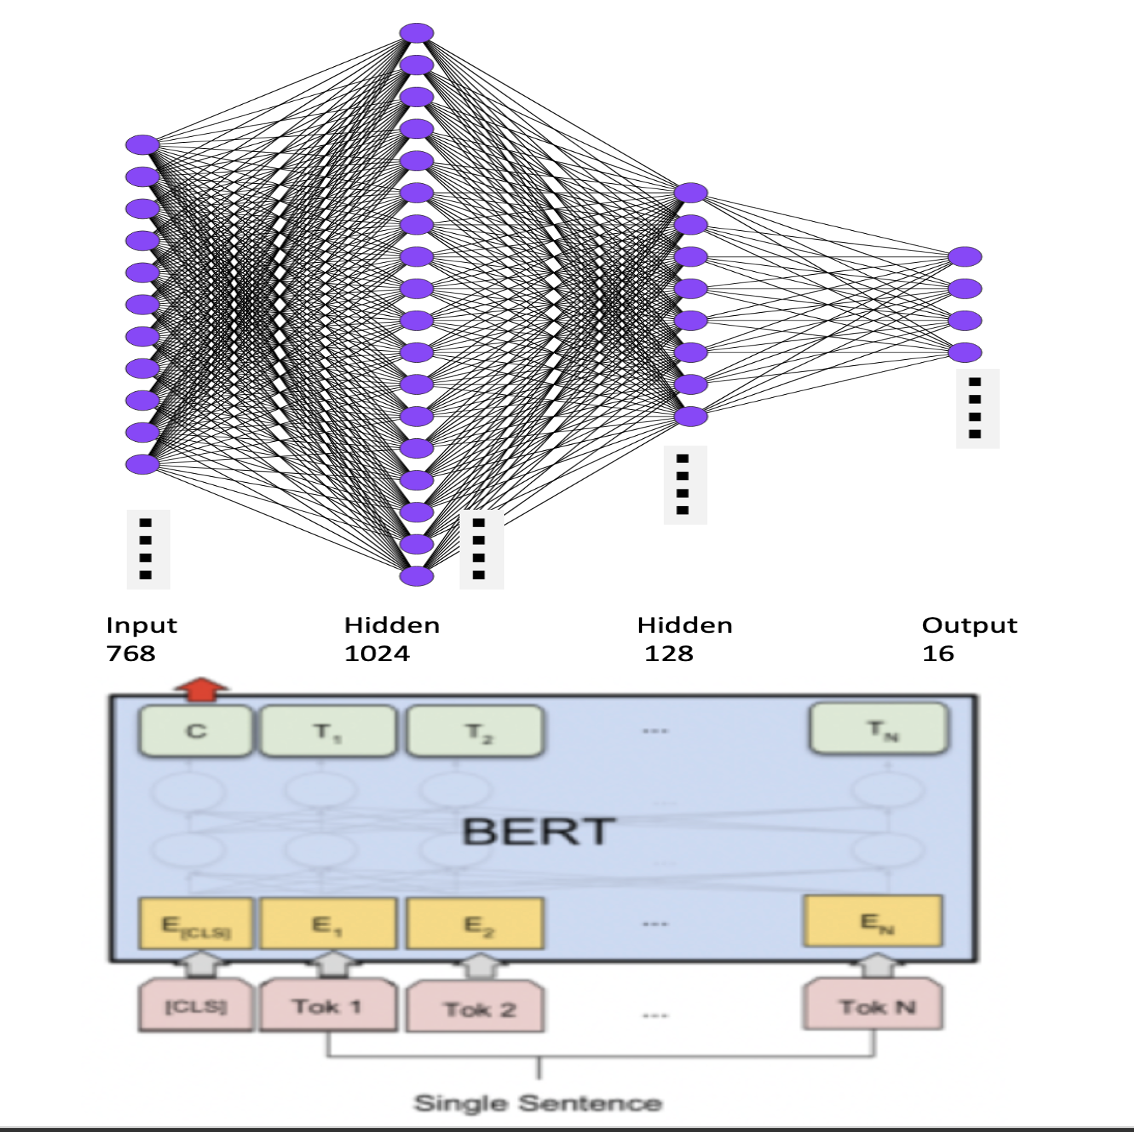

**Bert Model**

## 3.4 Load Pre-trained Model

In [ ]:
#@title Load BERT embedding layer from TF hub   { form-width: "200px" }
import tensorflow_hub as hub
# load pretrained bert embedding layer
# module_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
module_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(module_url, trainable=True) #false in case of freezing  the bert layer

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2, Total size: 421.50MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'.


In [ ]:
#@title Load Tokenizer { form-width: "200px" }
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)


## 3.5 BERT input sequence encodding 

In [ ]:
#@title Input encoder { form-width: "200px" }
def input_encode(posts, tokenizer, max_len):
    #toknized and encoded input ids
    input_ids = []
    # input attention mask for padded sequences 
    input_attention_masks = []
    # input segmentation ids to identify second sentence
    input_segmentations = []
    
    for post in posts:
        # tokenize the each sentence or post
        post = tokenizer.tokenize(post)
        # add CLS and SEP 
        post = post[:max_len-2]
        input_sequence = ["[CLS]"] + post + ["[SEP]"]
        # check pad length
        pad_len = max_len - len(input_sequence)
        
        # convert tokens to numbered encoding 
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len

        # add 1 's to tokens and zoros for no tokens or empty one
        pad_masks = [1] * len(input_sequence) + [0] * pad_len

        # add 0 as segmentation ID as it is only one sequence sentence
        segment_ids = [0] * max_len
        
        
        input_ids.append(tokens)
        input_attention_masks.append(pad_masks)
        input_segmentations.append(segment_ids)
    
    return np.array(input_ids), np.array(input_attention_masks), np.array(input_segmentations)

## 3.6  Model Setup

### 3.6.1 Optimizer

SGD with momentum is method which helps accelerate gradients vectors in the right directions, thus leading to faster converging


When nesterov=True, this rule becomes:

velocity = momentum * velocity - learning_rate * g
w = w + momentum * velocity - learning_rate * g

Adam(Adaptive Moment estimation) is acommbination of momentum and RMS prop(Root mean square propagation)

-It improves the speed of training
It use the idea of momentum to memorize previous gradients
It use the idea of RMSProp to distinguish updates along features
Algorithm 5: Adam(Kingma and Ba, 2014)

Adagrad decays learning rate very aggressively (as denominator grows)
After a while the dense feature will receive small updates
RMSProp is introduced to prevent rapid growth of denominator (β = 0.9)



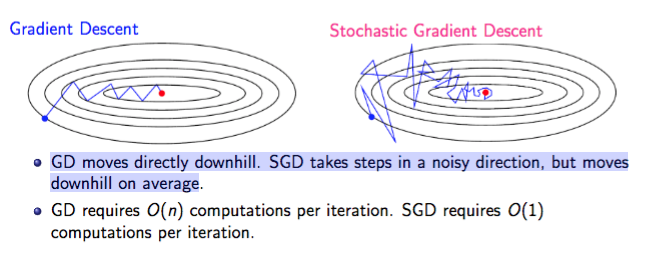

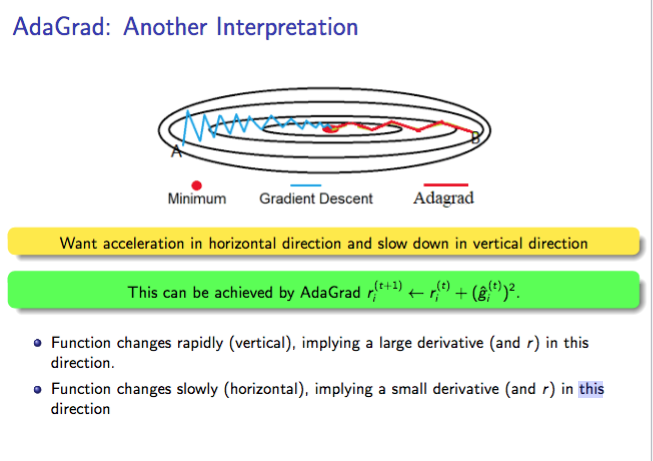


### 3.6.2 Optimizer comparation


Adam(Adaptive Moment estimation) is acommbination of momentum and RMS prop(Root mean square propagation)
-It improves the speed of training It use the idea of momentum to memorize previous gradients It use the idea of RMSProp to distinguish updates along features.
Evenif,Adam optimizer is best in differet optimization problems some experment is conducted to select the right optimizer for the model I am developing by using. The result shows Adam optimizer outperforms interms of loss and accuracy when compared to the SGD and Adagrad optimizers as shown below. Therfore, Adam is selected as an optimizer to train my model. 

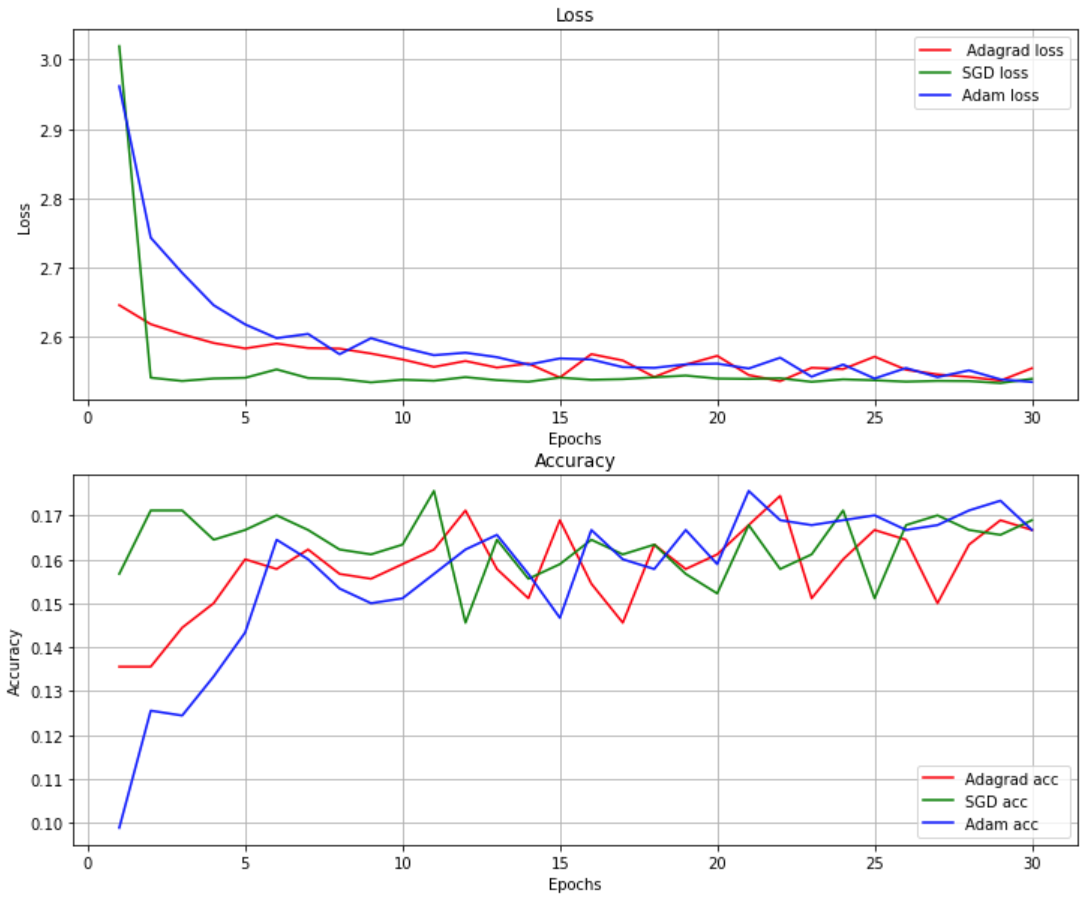

### 3.6.3 Model

In [ ]:
#@title Hyperparameter and matrics { form-width: "200px" }
# metrix=['accuracy','recall','f1-score']
metrix=['accuracy']
epochs=150
max_len=512
batch_size=10
number_of_classes=16
learning_rate=1e-5
patience=15


In [ ]:
#@title BERT Classifier Model  { form-width: "200px" }
def BertTextClassifier(bert_layer, max_len):
    # three input for bert emdedding layer of size max length
    input_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")
    # bert layer is the pretrained model  used to train the model
    pooled_output, sequence_output = bert_layer([input_ids, input_mask, segment_ids])
    # select the classifier output of BERT
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(1024, activation='relu')(clf_output)
    net = tf.keras.layers.Dropout(0.5)(net)
    # net = tf.keras.layers.Dense(512, activation='relu')(net)
    # net = tf.keras.layers.Dropout(0.5)(net)
    net = tf.keras.layers.Dense(128, activation='relu')(net)
    # net = tf.keras.layers.Dropout(0.2)(net)
    # net = tf.keras.layers.Dense(64, activation='relu')(net)
    # net = tf.keras.layers.Dropout(0.2)(net)
    # net = tf.keras.layers.Dense(32, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.5)(net)
    out = tf.keras.layers.Dense(number_of_classes, activation='softmax')(net)
    
    model = tf.keras.models.Model(inputs=[input_ids, input_mask, segment_ids], outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=metrix)
   # model.compile(tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0), loss='categorical_crossentropy', metrics=metrix)
   # model.compile(tf.keras.optimizers.SGD(lr=0.1, momentum=0.8, nesterov=False), loss='categorical_crossentropy', metrics=metrix)

    return model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 512)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 512)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_ids[0][0]',              
                                 (None, 512, 768)]                'input_mask[0][0]',         

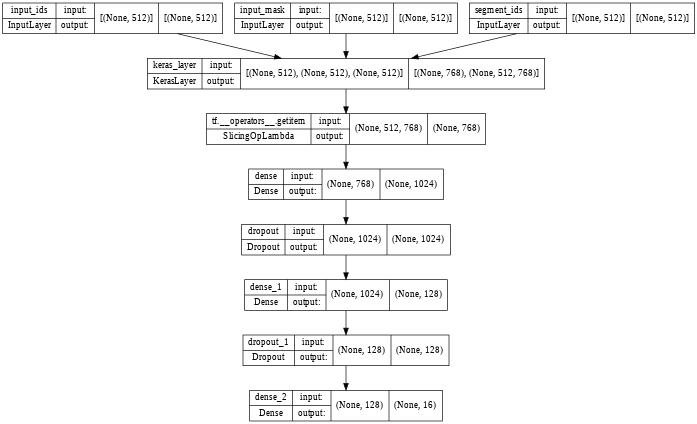

In [ ]:
#@title Summary of the classifier model { form-width: "200px" }
model = BertTextClassifier(bert_layer, max_len=max_len)
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, dpi=48)

## 3.7  Train Model and Evaluation

### 3.7.0 Train tweets dataset without augmentation 

####3.7.0.1 Original datset

The orginal datset without augmentation and truncating the texts which has got longer than BERT max limit which is 512

In [ ]:
#@title load after split { form-width: "200px" }
# path 0 original 512 only
train_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/0_train_tweets.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/0_validation_tweets.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/0_test_tweets.csv'
# save after split
train_df=pd.read_csv(train_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)
print(train_df.shape, val_df.shape, test_df.shape)

(900, 3) (300, 3) (300, 3)


In [ ]:
#@title Encode train, validation and test data and convert to one hote encode { form-width: "200px" }
print("train_input encoding starts...")
train_input = input_encode(train_df.posts.values, tokenizer, max_len=max_len)
train_labels= tf.keras.utils.to_categorical(train_df.type_encoding.values, num_classes=number_of_classes)
print("train_input encoding End")

print("val_input encoding starts...")
val_input=input_encode(val_df.posts.values, tokenizer, max_len=max_len)
val_labels= tf.keras.utils.to_categorical(val_df.type_encoding.values, num_classes=number_of_classes)
print("valinput encoding End")

print("test_input encoding starts...")
test_input = input_encode(test_df.posts.values, tokenizer, max_len=max_len)
test_labels= tf.keras.utils.to_categorical(test_df.type_encoding.values, num_classes=number_of_classes)
print("test_input encoding End")

train_input encoding starts...
train_input encoding End
val_input encoding starts...
valinput encoding End
test_input encoding starts...
test_input encoding End


In [ ]:
# saving the encoded inputs
# pickle used to transform complex object to byte stream and vice versa with the same intenal structure
import pickle
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/0/train_input.pickle','wb') as pkl_train:
  pickle.dump(train_input,pkl_train)

with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/0/val_input.pickle','wb') as pkl_val:
  pickle.dump(val_input, pkl_val)
              
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/0/test_input.pickle','wb') as pkl_test:
  pickle.dump(test_input, pkl_test)
              

In [ ]:
import pickle
# load the encoded input
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/0/train_input.pickle', 'rb')as pkl_train:
  train_input=pickle.load(pkl_train)
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/0/val_input.pickle', 'rb')as pkl_val:
  val_input=pickle.load(pkl_val)
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/0/test_input.pickle', 'rb')as pkl_test:
  test_input=pickle.load(pkl_test)

In [ ]:
#@title Model training { form-width: "200px" }
#best tweets_df original
train_history = model.fit(
    train_input, train_labels, 
    validation_data=(val_input, val_labels),
    epochs=epochs,
    callbacks=[checkpoint, earlystopping],
    batch_size=batch_size,
    workers=1)

Epoch 1/150
90/90 [==============================] - ETA: 0s - loss: 2.7576 - accuracy: 0.1200
Epoch 1: val_accuracy improved from -inf to 0.15667, saving model to /content/drive/MyDrive/Personality_classifier/model/0_weets_512.h5
90/90 [==============================] - 61s 484ms/step - loss: 2.7576 - accuracy: 0.1200 - val_loss: 2.6121 - val_accuracy: 0.1567
Epoch 2/150
90/90 [==============================] - ETA: 0s - loss: 2.6450 - accuracy: 0.1411
Epoch 2: val_accuracy did not improve from 0.15667
90/90 [==============================] - 39s 436ms/step - loss: 2.6450 - accuracy: 0.1411 - val_loss: 2.5949 - val_accuracy: 0.1567
Epoch 3/150
90/90 [==============================] - ETA: 0s - loss: 2.6330 - accuracy: 0.1500
Epoch 3: val_accuracy did not improve from 0.15667
90/90 [==============================] - 39s 436ms/step - loss: 2.6330 - accuracy: 0.1500 - val_loss: 2.5870 - val_accuracy: 0.1567
Epoch 4/150
90/90 [==============================] - ETA: 0s - loss: 2.6600 - acc

In [ ]:
# save history
# syno_aug_before_split_tweets_512
history_path='/content/drive/MyDrive/Model_histories/my_history_0_tweets_512.npy'
np.save(history_path,train_history.history)

In [ ]:
# Load
history_path='/content/drive/MyDrive/Model_histories/my_history_0_adam3_tweets_512.npy'
history_dict=np.load(history_path,allow_pickle='TRUE').item()

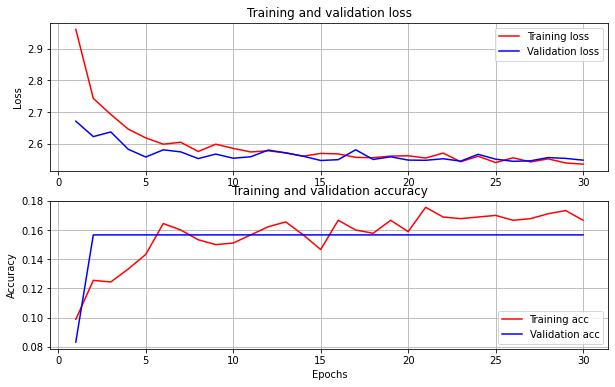

In [ ]:
#@title graph of training loss and  accuracy, and validation loss and accuracy { form-width: "200px" }
# syno_aug_tweets_512
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()

####3.7.0.2 Adjusted original data

Unaugmented dataset but adjusted to the BERT limit and use the remaining as new sample

In [ ]:
#@title load after split { form-width: "200px" }
# load the splited value
train_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/unaug_train_tweets_512.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/validation_tweets_512.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/test_tweets_512.csv'
# load
train_df=pd.read_csv(train_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)
print(train_df.shape, val_df.shape, test_df.shape)

(7886, 3) (2629, 3) (2629, 3)


In [ ]:
#@title Encode train, validation and test data and convert to one hote encode { form-width: "200px" }
print("train_input encoding starts...")
train_input = input_encode(train_df.posts.values, tokenizer, max_len=max_len)
train_labels= tf.keras.utils.to_categorical(train_df.type_encoding.values, num_classes=number_of_classes)
print("train_input encoding End")

print("val_input encoding starts...")
val_input=input_encode(val_df.posts.values, tokenizer, max_len=max_len)
val_labels= tf.keras.utils.to_categorical(val_df.type_encoding.values, num_classes=number_of_classes)
print("valinput encoding End")

print("test_input encoding starts...")
test_input = input_encode(test_df.posts.values, tokenizer, max_len=max_len)
test_labels= tf.keras.utils.to_categorical(test_df.type_encoding.values, num_classes=number_of_classes)
print("test_input encoding End")

train_input encoding starts...
train_input encoding End
val_input encoding starts...
valinput encoding End
test_input encoding starts...
test_input encoding End


In [ ]:
# saving the encoded inputs
# pickle used to transform complex object to byte stream and vice versa with the same intenal structure
import pickle
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/1/train_input.pickle','wb') as pkl_train:
  pickle.dump(train_input,pkl_train)

with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/1/val_input.pickle','wb') as pkl_val:
  pickle.dump(val_input, pkl_val)
              
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/1/test_input.pickle','wb') as pkl_test:
  pickle.dump(test_input, pkl_test)
              

In [ ]:
import pickle
# load the encoded input
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/1/train_input.pickle', 'rb')as pkl_train:
  train_input=pickle.load(pkl_train)
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/1/val_input.pickle', 'rb')as pkl_val:
  val_input=pickle.load(pkl_val)
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/1/test_input.pickle', 'rb')as pkl_test:
  test_input=pickle.load(pkl_test)

In [ ]:
# save checkpoint 
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Personality_classifier/model/1_syno_aug_train_tweets_512.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, verbose=1)


In [ ]:
#@title Model training { form-width: "200px" }
# tweets-512 adjusted only
train_history = model.fit(
    train_input, train_labels, 
    validation_data=(val_input, val_labels),
    epochs=epochs,
    callbacks=[checkpoint, earlystopping],
    batch_size=batch_size,
    workers=1)

Epoch 1/150
789/789 [==============================] - ETA: 0s - loss: 2.6580 - accuracy: 0.1276
Epoch 1: val_accuracy improved from -inf to 0.17383, saving model to /content/drive/MyDrive/Personality_classifier/model/1_syno_aug_train_tweets_512.h5
789/789 [==============================] - 366s 442ms/step - loss: 2.6580 - accuracy: 0.1276 - val_loss: 2.5537 - val_accuracy: 0.1738
Epoch 2/150
789/789 [==============================] - ETA: 0s - loss: 2.6120 - accuracy: 0.1383
Epoch 2: val_accuracy improved from 0.17383 to 0.17992, saving model to /content/drive/MyDrive/Personality_classifier/model/1_syno_aug_train_tweets_512.h5
789/789 [==============================] - 355s 450ms/step - loss: 2.6120 - accuracy: 0.1383 - val_loss: 2.5396 - val_accuracy: 0.1799
Epoch 3/150
789/789 [==============================] - ETA: 0s - loss: 2.5626 - accuracy: 0.1635
Epoch 3: val_accuracy improved from 0.17992 to 0.19589, saving model to /content/drive/MyDrive/Personality_classifier/model/1_syno_a

In [ ]:
# save
history_path='/content/drive/MyDrive/Model_histories/1_my_history_tweets_512.npy'
np.save(history_path,train_history.history)

In [ ]:
# Load
history_path='/content/drive/MyDrive/Model_histories/1_my_history_tweets_512.npy'
history_dict=np.load(history_path,allow_pickle='TRUE').item()

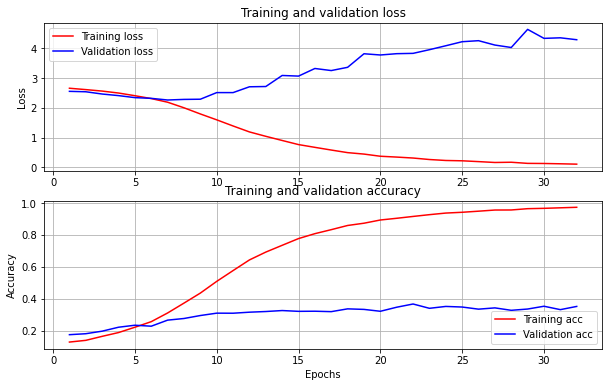

In [ ]:
#@title graph of training loss and  accuracy, and validation loss and accuracy { form-width: "200px" }
# syno_aug_tweets_512
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    figure = plt.figure(figsize=(12, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    # plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        # plt.text(j,i,format(cm[i,j],'.2%'),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')
        # plt.text(j,i,format(cm[i,j],'.2f'),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')
        plt.text(j,i,format(''),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# syno_aug_tweets_512 model was named 101
# load and test
model.load_weights('/content/drive/MyDrive/Personality_classifier/model/1_syno_aug_train_tweets_512.h5')
pred_prob=model.predict(test_input) 
y_pred=np.argmax(pred_prob, axis=1)
y_test=np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[130  32   6   1   3   1   8   0  43   8  22   0   4   2   0   1]
 [ 30 107   6   2   2   0   4   2  32  17  36   2  10   2   5   2]
 [ 30  24  55   2   2   1   5   0  23   5  29   3  13   4   8   0]
 [  5  11  13  37   2   1   0   1   5   8  30  13   7   8   3   0]
 [  6  11   2   1  22   0   1   0   6   4   5   1   2   4   2   1]
 [  4   8   1   0   2   5   0   0   7  11   4   2   4   2   1   1]
 [ 10  11   0   0   5   0  14   0   8   1   3   2   2   2   1   0]
 [  1   2   2   0   0   0   1   0   2   3   3   0   0   0   1   0]
 [ 31  40   6   0   3   0   3   1 238  36  58   5  17   2   4   1]
 [ 18  29   1   0   3   0   1   0  76 100  24  14  12   8   1   1]
 [ 17  28   2   1   2   1   2   0  26  21 156   9  10   3   7   0]
 [ 13   7   3   2   0   2   2   1  21  21  43  44   3   7   1   1]
 [  5  16   0   0   2   0   1   0  26   7  23   3  42   4   3   1]
 [  5   6   0   0   2   1   0   0  11  23  14   4   6  14   2   1]
 [  7  16   4   1   1   1   1   0  19   4  21   4  12   3  32 

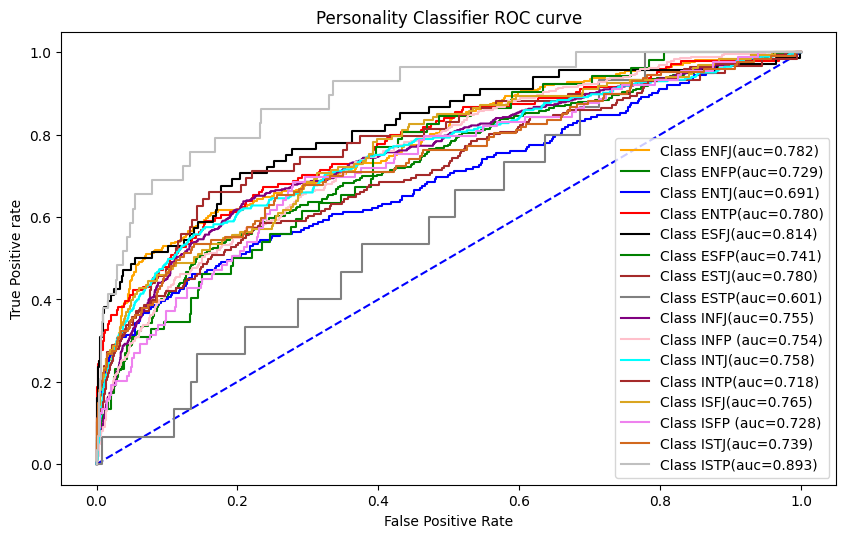

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)

# roc curve for classes

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# fpr, tpr, _ = roc_curve(y, pred)
# roc_auc = auc(fpr, tpr)
fpr = {}
tpr = {}
thresh ={}
# plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')

n_class = 16

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.figure(figsize=(10,6), dpi=100)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='Class '+lab_encoder.classes_[0]+'(auc=%0.3f)'%auc(fpr[0],tpr[0]))
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='Class '+lab_encoder.classes_[1]+'(auc=%0.3f)'%auc(fpr[1],tpr[1]))
plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class '+lab_encoder.classes_[2]+'(auc=%0.3f)'%auc(fpr[2],tpr[2]))
plt.plot(fpr[3], tpr[3], linestyle='-',color='red', label='Class '+lab_encoder.classes_[3]+'(auc=%0.3f)'%auc(fpr[3],tpr[3]))
plt.plot(fpr[4], tpr[4], linestyle='-',color='black', label='Class '+lab_encoder.classes_[4]+ '(auc=%0.3f)'%auc(fpr[4],tpr[4]))
plt.plot(fpr[5], tpr[5], linestyle='-',color='green', label='Class '+lab_encoder.classes_[5]+'(auc=%0.3f)'%auc(fpr[5],tpr[5]))
plt.plot(fpr[6], tpr[6], linestyle='-',color='brown', label='Class '+lab_encoder.classes_[6]+'(auc=%0.3f)'%auc(fpr[6],tpr[6]))
plt.plot(fpr[7], tpr[7], linestyle='-',color='gray', label='Class '+lab_encoder.classes_[7]+'(auc=%0.3f)'%auc(fpr[7],tpr[7]))
plt.plot(fpr[8], tpr[8], linestyle='-',color='purple', label='Class '+lab_encoder.classes_[8]+'(auc=%0.3f)'%auc(fpr[8],tpr[8]))
plt.plot(fpr[9], tpr[9], linestyle='-',color='pink', label='Class '+lab_encoder.classes_[9]+' (auc=%0.3f)'%auc(fpr[9],tpr[9]))
plt.plot(fpr[10], tpr[10], linestyle='-',color='aqua', label='Class '+lab_encoder.classes_[10]+'(auc=%0.3f)'%auc(fpr[10],tpr[10]))
plt.plot(fpr[11], tpr[11], linestyle='-',color='brown', label='Class '+lab_encoder.classes_[11]+'(auc=%0.3f)'%auc(fpr[11],tpr[11]))
plt.plot(fpr[12], tpr[12], linestyle='-',color='goldenrod', label='Class '+lab_encoder.classes_[12]+'(auc=%0.3f)'%auc(fpr[12],tpr[12]))
plt.plot(fpr[13], tpr[13], linestyle='-',color='violet', label='Class '+lab_encoder.classes_[13]+' (auc=%0.3f)'%auc(fpr[13],tpr[13]))
plt.plot(fpr[14], tpr[14], linestyle='-',color='chocolate', label='Class '+lab_encoder.classes_[14]+'(auc=%0.3f)'%auc(fpr[14],tpr[14]))
plt.plot(fpr[15], tpr[15], linestyle='-',color='silver', label='Class '+lab_encoder.classes_[15]+'(auc=%0.3f)'%auc(fpr[15],tpr[15]))
plt.title('Personality Classifier ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Personality Classifier ROC',dpi=500); 

Confusion matrix


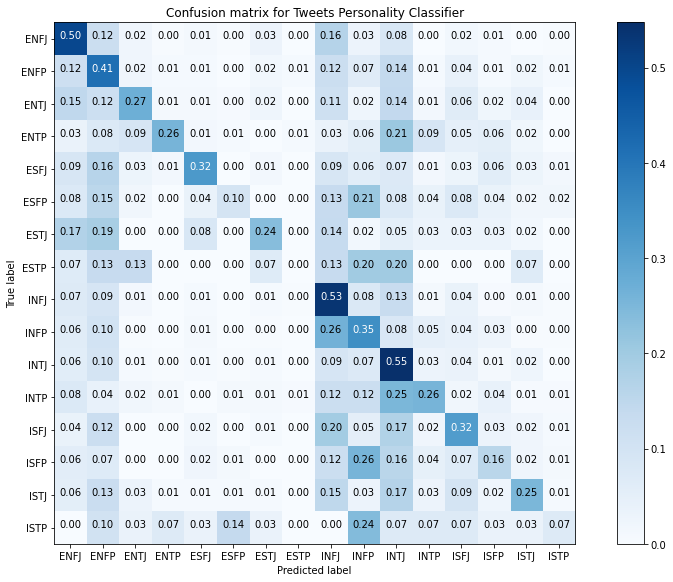

In [ ]:
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)


# syno_aug_tweets_512
# Compute confusion matrix
cnf_matrix = cm
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot confusion matrix

title="Tweets Personality Classifier"
plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,title=('Confusion matrix for %s' % title)) 

Confusion matrix


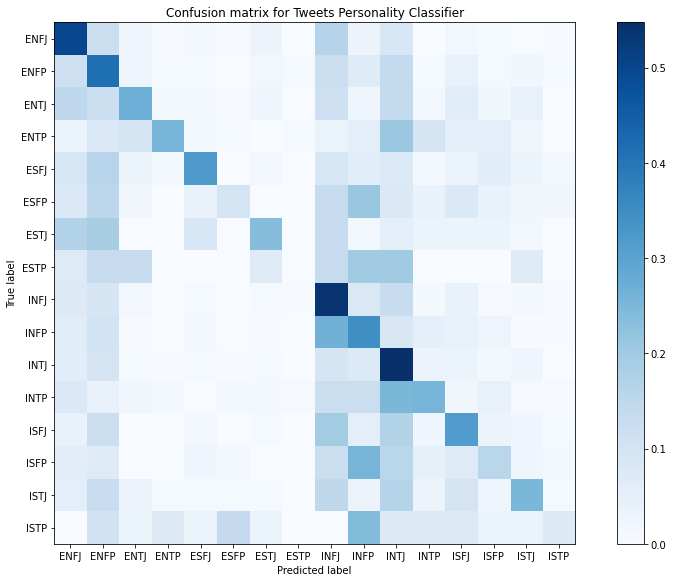

In [ ]:
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)


# syno_aug_tweets_512
# Compute confusion matrix
cnf_matrix = cm
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot confusion matrix

title="Tweets Personality Classifier"
plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,title=('Confusion matrix for %s' % title)) 

### 3.7.1 512_seq_len synonym augmented training input 

#### 3.7.1.1  Train Synonym augmented training input of length 512

In [ ]:
aug_train_tweet_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_train_tweets_512.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/validation_tweets_512.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/test_tweets_512.csv'
#load
train_df=pd.read_csv(aug_train_tweet_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)
print(train_df.shape, val_df.shape, test_df.shape)

(21547, 3) (2629, 3) (2629, 3)


In [ ]:
#@title Encode train, validation and test data and convert to one hote encode { form-width: "200px" }
print("train_input encoding starts...")
train_input = input_encode(train_df.posts.values, tokenizer, max_len=max_len)
train_labels= tf.keras.utils.to_categorical(train_df.type_encoding.values, num_classes=number_of_classes)
print("train_input encoding End")

print("val_input encoding starts...")
val_input=input_encode(val_df.posts.values, tokenizer, max_len=max_len)
val_labels= tf.keras.utils.to_categorical(val_df.type_encoding.values, num_classes=number_of_classes)
print("valinput encoding End")

print("test_input encoding starts...")
test_input = input_encode(test_df.posts.values, tokenizer, max_len=max_len)
test_labels= tf.keras.utils.to_categorical(test_df.type_encoding.values, num_classes=number_of_classes)
print("test_input encoding End")

train_input encoding starts...
train_input encoding End
val_input encoding starts...
valinput encoding End
test_input encoding starts...
test_input encoding End


In [ ]:
# saving the encoded inputs
# pickle used to transform complex object to byte stream and vice versa with the same intenal structure
import pickle
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/syno_aug_train_tweets_512/train_input.pickle','wb') as pkl_train:
  pickle.dump(train_input,pkl_train)

with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/syno_aug_train_tweets_512/val_input.pickle','wb') as pkl_val:
  pickle.dump(val_input, pkl_val)
              
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/syno_aug_train_tweets_512/test_input.pickle','wb') as pkl_test:
  pickle.dump(test_input, pkl_test)
              

In [ ]:
import pickle
# load the encoded input
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/syno_aug_train_tweets_512/train_input.pickle', 'rb')as pkl_train:
  train_input=pickle.load(pkl_train)
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/syno_aug_train_tweets_512/val_input.pickle', 'rb')as pkl_val:
  val_input=pickle.load(pkl_val)
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/syno_aug_train_tweets_512/test_input.pickle', 'rb')as pkl_test:
  test_input=pickle.load(pkl_test)

In [ ]:
# save checkpoint 

checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Personality_classifier/model/syno_aug_train_tweets_512.h5', monitor='val_accuracy', save_best_only=True, verbose=1)#synonym only


earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, verbose=1)


In [ ]:
# load input file
aug_train_tweet_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_train_tweets_512.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/validation_tweets_512.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/test_tweets_512.csv'
#load
train_df=pd.read_csv(aug_train_tweet_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)
print(train_df.shape, val_df.shape, test_df.shape)

(21547, 3) (2629, 3) (2629, 3)


In [ ]:
#@title Model training { form-width: "200px" }
# syno_aug_tweets_512
train_history = model.fit(
    train_input, train_labels, 
    validation_data=(val_input, val_labels),
    epochs=epochs,
    callbacks=[checkpoint, earlystopping],
    batch_size=batch_size,
    workers=1)

Epoch 1/150
2155/2155 [==============================] - ETA: 0s - loss: 2.7204 - accuracy: 0.1076
Epoch 1: val_accuracy improved from -inf to 0.17459, saving model to /content/drive/MyDrive/Personality_classifier/model/syno_aug_train_processed_tweets_101.h5
2155/2155 [==============================] - 908s 413ms/step - loss: 2.7204 - accuracy: 0.1076 - val_loss: 2.5859 - val_accuracy: 0.1746
Epoch 2/150
2155/2155 [==============================] - ETA: 0s - loss: 2.3966 - accuracy: 0.2278
Epoch 2: val_accuracy improved from 0.17459 to 0.18144, saving model to /content/drive/MyDrive/Personality_classifier/model/syno_aug_train_processed_tweets_101.h5
2155/2155 [==============================] - 897s 416ms/step - loss: 2.3966 - accuracy: 0.2278 - val_loss: 2.5011 - val_accuracy: 0.1814
Epoch 3/150
2155/2155 [==============================] - ETA: 0s - loss: 1.9891 - accuracy: 0.3582
Epoch 3: val_accuracy improved from 0.18144 to 0.21225, saving model to /content/drive/MyDrive/Personality

#### 3.7.1.2  Evaluate Synonym augmented training input of length 512

In [ ]:
#evaluate model
# syno_aug_tweets_512
acc= model.evaluate(test_input,test_labels )

83/83 [==============================] - 34s 392ms/step - loss: 3.4729 - accuracy: 0.4131


In [ ]:
# syno_aug_tweets_512
# save history
history_path='/content/drive/MyDrive/Model_histories/my_history_syno_aug_train__tweets_512.npy'

np.save(history_path,train_history.history)

In [ ]:
# syno_aug_tweets_512
# load history dic
history=np.load(history_path,allow_pickle='TRUE').item()

In [ ]:
#@title Model traing history { form-width: "200px" }
# syno_aug_tweets_512
history_dict = train_history .history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


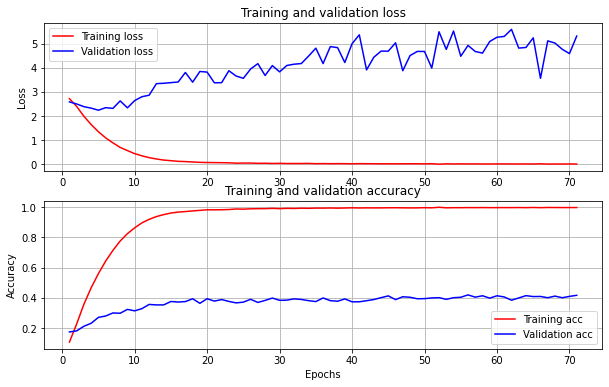

In [ ]:
#@title graph of training loss and  accuracy, and validation loss and accuracy { form-width: "200px" }
# syno_aug_tweets_512
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    figure = plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    # plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        # plt.text(j,i,format(cm[i,j],'.2%'),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')
        # plt.text(j,i,format(cm[i,j],'.2f'),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')
        plt.text(j,i,format(''),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# syno_aug_tweets_512 model was named 101
# load and test
model.load_weights('/content/drive/MyDrive/Personality_classifier/model/syno_aug_train_tweets_512.h5')
pred_prob=model.predict(test_input) 
y_pred=np.argmax(pred_prob, axis=1)
y_test=np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 88  31   5   0   4   4   5   0  64  11  31   1   8   4   5   0]
 [  6  97   6   3   3   3   3   0  45  25  43   2  10   6   5   2]
 [ 10  31  56   3   3   7   3   0  18   8  41   3  14   1   5   1]
 [  2  13   4  42   1   0   1   0   4  11  44   6   6   5   4   1]
 [  2   6   1   0  28   4   2   0   5   1  10   0   2   4   3   0]
 [  1   3   1   1   1  13   1   0   6   8   5   0   7   4   0   1]
 [  5  10   1   0   2   2  20   0   5   1   9   1   2   1   0   0]
 [  2   1   2   1   0   1   1   2   0   1   4   0   0   0   0   0]
 [ 10  40   2   0   3   7   0   0 232  54  54   4  20  13   6   0]
 [  3  18   1   5   2   3   0   0  46 134  46   5   7  14   1   3]
 [  3  18   6   4   0   2   4   0  23  20 178   8  14   3   1   1]
 [  2  15   5   4   0   1   0   0  11  31  64  31   3   1   0   3]
 [  1   9   1   0   3   1   1   0  28  10  21   0  52   3   2   1]
 [  1   2   0   0   1   2   1   0  14  19  14   2   8  23   1   1]
 [  6  21   2   8   4   1   4   0  15   5  16   1   9   2  33 

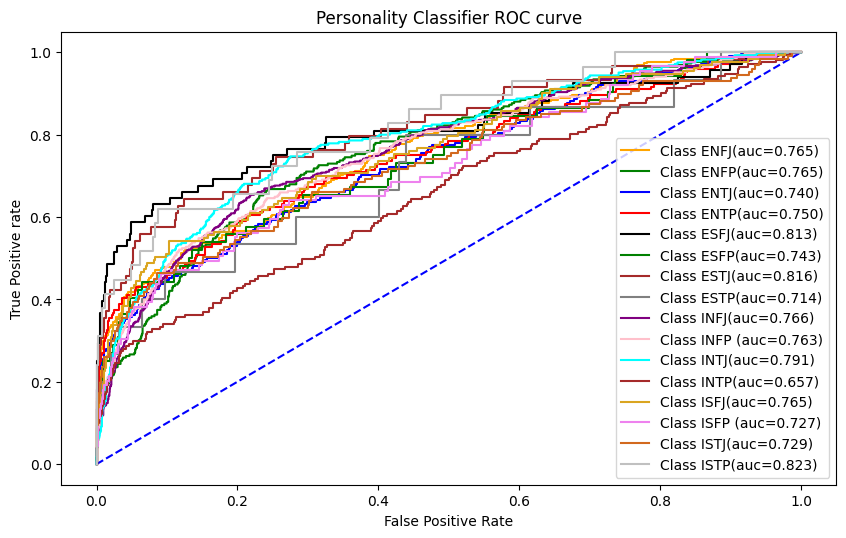

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)

# roc curve for classes

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# fpr, tpr, _ = roc_curve(y, pred)
# roc_auc = auc(fpr, tpr)
fpr = {}
tpr = {}
thresh ={}
# plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')

n_class = 16

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.figure(figsize=(10,6), dpi=100)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='Class '+lab_encoder.classes_[0]+'(auc=%0.3f)'%auc(fpr[0],tpr[0]))
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='Class '+lab_encoder.classes_[1]+'(auc=%0.3f)'%auc(fpr[1],tpr[1]))
plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class '+lab_encoder.classes_[2]+'(auc=%0.3f)'%auc(fpr[2],tpr[2]))
plt.plot(fpr[3], tpr[3], linestyle='-',color='red', label='Class '+lab_encoder.classes_[3]+'(auc=%0.3f)'%auc(fpr[3],tpr[3]))
plt.plot(fpr[4], tpr[4], linestyle='-',color='black', label='Class '+lab_encoder.classes_[4]+ '(auc=%0.3f)'%auc(fpr[4],tpr[4]))
plt.plot(fpr[5], tpr[5], linestyle='-',color='green', label='Class '+lab_encoder.classes_[5]+'(auc=%0.3f)'%auc(fpr[5],tpr[5]))
plt.plot(fpr[6], tpr[6], linestyle='-',color='brown', label='Class '+lab_encoder.classes_[6]+'(auc=%0.3f)'%auc(fpr[6],tpr[6]))
plt.plot(fpr[7], tpr[7], linestyle='-',color='gray', label='Class '+lab_encoder.classes_[7]+'(auc=%0.3f)'%auc(fpr[7],tpr[7]))
plt.plot(fpr[8], tpr[8], linestyle='-',color='purple', label='Class '+lab_encoder.classes_[8]+'(auc=%0.3f)'%auc(fpr[8],tpr[8]))
plt.plot(fpr[9], tpr[9], linestyle='-',color='pink', label='Class '+lab_encoder.classes_[9]+' (auc=%0.3f)'%auc(fpr[9],tpr[9]))
plt.plot(fpr[10], tpr[10], linestyle='-',color='aqua', label='Class '+lab_encoder.classes_[10]+'(auc=%0.3f)'%auc(fpr[10],tpr[10]))
plt.plot(fpr[11], tpr[11], linestyle='-',color='brown', label='Class '+lab_encoder.classes_[11]+'(auc=%0.3f)'%auc(fpr[11],tpr[11]))
plt.plot(fpr[12], tpr[12], linestyle='-',color='goldenrod', label='Class '+lab_encoder.classes_[12]+'(auc=%0.3f)'%auc(fpr[12],tpr[12]))
plt.plot(fpr[13], tpr[13], linestyle='-',color='violet', label='Class '+lab_encoder.classes_[13]+' (auc=%0.3f)'%auc(fpr[13],tpr[13]))
plt.plot(fpr[14], tpr[14], linestyle='-',color='chocolate', label='Class '+lab_encoder.classes_[14]+'(auc=%0.3f)'%auc(fpr[14],tpr[14]))
plt.plot(fpr[15], tpr[15], linestyle='-',color='silver', label='Class '+lab_encoder.classes_[15]+'(auc=%0.3f)'%auc(fpr[15],tpr[15]))
plt.title('Personality Classifier ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Personality Classifier ROC',dpi=500); 

Confusion matrix


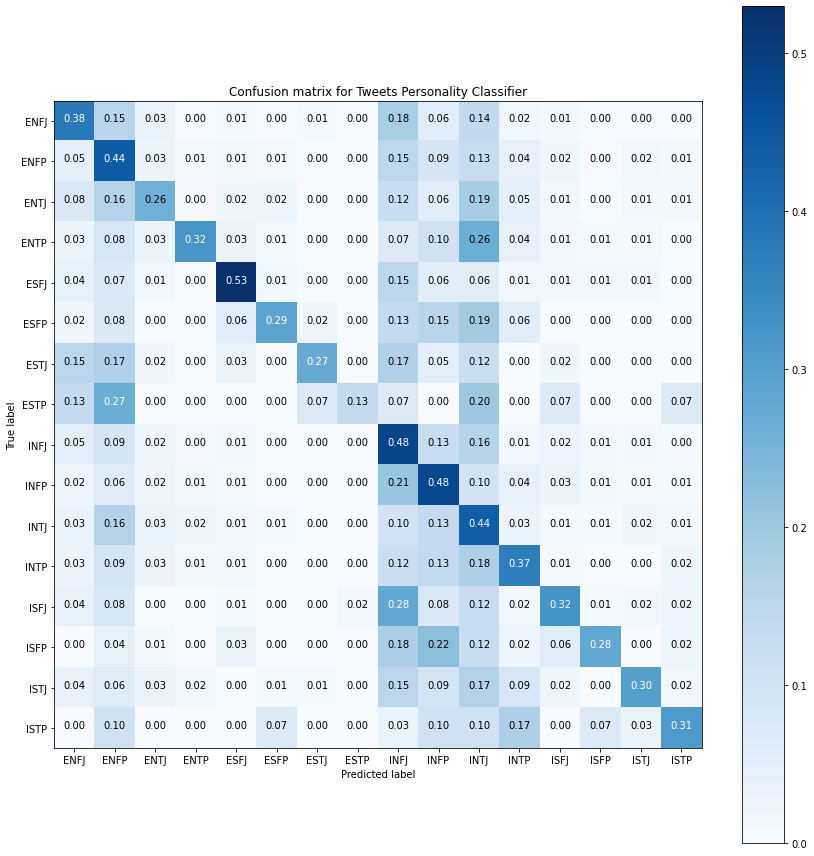

In [ ]:
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)


# syno_aug_tweets_512
# Compute confusion matrix
cnf_matrix = cm
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot confusion matrix

title="Tweets Personality Classifier"
plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,title=('Confusion matrix for %s' % title)) 

Confusion matrix


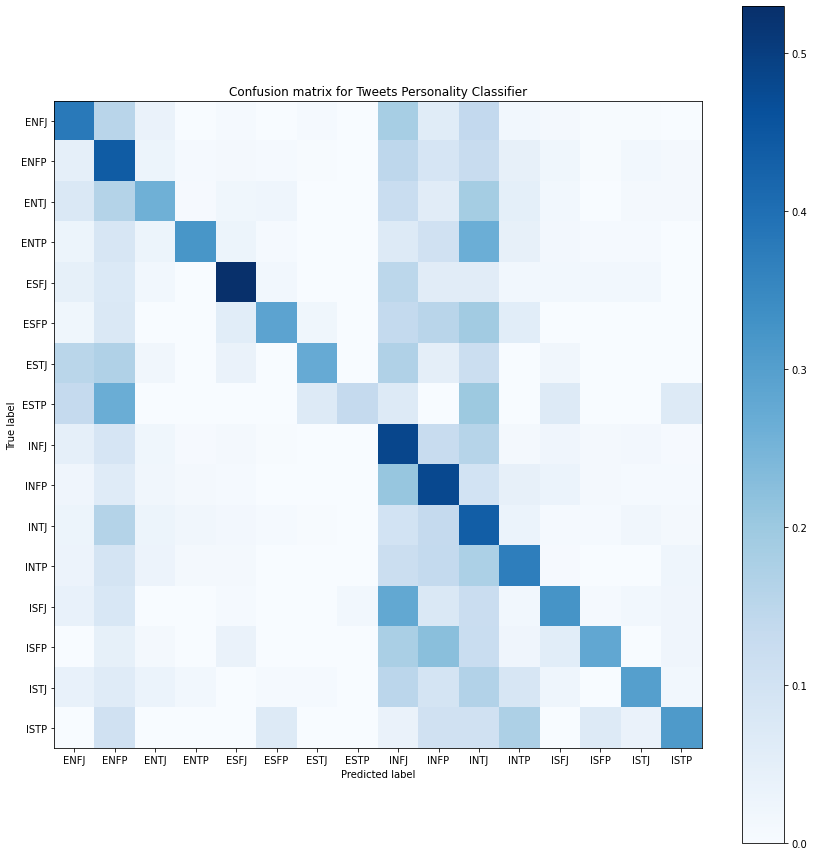

In [ ]:
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)


# syno_aug_tweets_512
# Compute confusion matrix
cnf_matrix = cm
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot confusion matrix

title="Tweets Personality Classifier"
plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,title=('Confusion matrix for %s' % title)) 

In [ ]:
 #@title classification report { form-width: "200px" }
#syno_aug_tweets_512
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.38      0.43       261
           1       0.31      0.44      0.36       259
           2       0.50      0.26      0.34       204
           3       0.73      0.32      0.44       144
           4       0.51      0.53      0.52        68
           5       0.50      0.29      0.37        52
           6       0.70      0.27      0.39        59
           7       0.50      0.13      0.21        15
           8       0.39      0.48      0.43       445
           9       0.36      0.48      0.41       288
          10       0.26      0.44      0.33       285
          11       0.44      0.37      0.40       171
          12       0.48      0.32      0.39       133
          13       0.61      0.28      0.38        89
          14       0.60      0.30      0.40       127
          15       0.27      0.31      0.29        29

    accuracy                           0.39      2629
   macro avg       0.48   

### 3.7.2 128_seq_len Synonym augmented training input

#### 3.7.2.1  Train Synonym augmented training input of length 128

In [ ]:
# path
train_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_train_weets_128.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/validation_tweets_128.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/test_tweets_128.csv'

# load
train_df=pd.read_csv(train_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)
print(train_df.shape, val_df.shape, test_df.shape)

(47506, 3) (10109, 3) (10110, 3)


In [ ]:
#@title Encode train, validation and test data and convert to one hote encode { form-width: "200px" }
print("train_input encoding starts...")
train_input = input_encode(train_df.posts.values, tokenizer, max_len=max_len)
train_labels= tf.keras.utils.to_categorical(train_df.type_encoding.values, num_classes=number_of_classes)
print("train_input encoding End")

print("val_input encoding starts...")
val_input=input_encode(val_df.posts.values, tokenizer, max_len=max_len)
val_labels= tf.keras.utils.to_categorical(val_df.type_encoding.values, num_classes=number_of_classes)
print("valinput encoding End")

print("test_input encoding starts...")
test_input = input_encode(test_df.posts.values, tokenizer, max_len=max_len)
test_labels= tf.keras.utils.to_categorical(test_df.type_encoding.values, num_classes=number_of_classes)
print("test_input encoding End")

train_input encoding starts...
train_input encoding End
val_input encoding starts...
valinput encoding End
test_input encoding starts...
test_input encoding End


In [ ]:
# saving the encoded inputs
# pickle used to transform complex object to byte stream and vice versa with the same intenal structure
import pickle
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/syno_aug_train_tweets_128/train_input.pickle','wb') as pkl_train:
  pickle.dump(train_input,pkl_train)

with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/syno_aug_train_tweets_128/val_input.pickle','wb') as pkl_val:
  pickle.dump(val_input, pkl_val)
              
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/syno_aug_train_tweets_128/test_input.pickle','wb') as pkl_test:
  pickle.dump(test_input, pkl_test)
              

In [ ]:
import pickle
# load the encoded input
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/syno_aug_train_tweets_128/train_input.pickle', 'rb')as pkl_train:
  train_input=pickle.load(pkl_train)
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/syno_aug_train_tweets_128/val_input.pickle', 'rb')as pkl_val:
  val_input=pickle.load(pkl_val)
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/syno_aug_train_tweets_128/test_input.pickle', 'rb')as pkl_test:
  test_input=pickle.load(pkl_test)

In [ ]:
# save checkpoint 
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Personality_classifier/model/syno_aug_train_processed_tweets_128_v1.h5', monitor='val_accuracy', save_best_only=True, verbose=1)#synonym only


earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, verbose=1)


In [ ]:
#@title Model training { form-width: "200px" }
#b tweet_128
train_history = model.fit(
    train_input, train_labels, 
    validation_data=(val_input, val_labels),
    epochs=epochs,
    callbacks=[checkpoint, earlystopping],
    batch_size=batch_size,
    workers=1)

Epoch 1/150
4532/4532 [==============================] - ETA: 0s - loss: 2.7155 - accuracy: 0.1168
Epoch 1: val_accuracy improved from -inf to 0.17921, saving model to /content/drive/MyDrive/Personality_classifier/model/syno_aug_train_processed_tweets_128.h5
4532/4532 [==============================] - 460s 97ms/step - loss: 2.7155 - accuracy: 0.1168 - val_loss: 2.5510 - val_accuracy: 0.1792
Epoch 2/150
4532/4532 [==============================] - ETA: 0s - loss: 2.4794 - accuracy: 0.2024
Epoch 2: val_accuracy improved from 0.17921 to 0.21055, saving model to /content/drive/MyDrive/Personality_classifier/model/syno_aug_train_processed_tweets_128.h5
4532/4532 [==============================] - 444s 98ms/step - loss: 2.4794 - accuracy: 0.2024 - val_loss: 2.4259 - val_accuracy: 0.2105
Epoch 3/150
4532/4532 [==============================] - ETA: 0s - loss: 2.2049 - accuracy: 0.2837
Epoch 3: val_accuracy improved from 0.21055 to 0.23978, saving model to /content/drive/MyDrive/Personality_c

#### 3.7.2.2  Evaluate Synonym augmented training input of length 128

In [ ]:
# syno_aug_tweets_128
acc= model.evaluate(test_input,test_labels )

316/316 [==============================] - 29s 91ms/step - loss: 4.9289 - accuracy: 0.3833


In [ ]:
# syno_aug_tweets_128
# save history
history_path='/content/drive/MyDrive/Model_histories/my_history_syno_aug_train__tweets_128.npy'



np.save(history_path,train_history.history)

In [ ]:
# syno_aug_tweets_512
# load history dic
history=np.load(history_path,allow_pickle='TRUE').item()

In [ ]:
# 128
#@title Model traing history { form-width: "200px" }
history_dict = train_history .history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


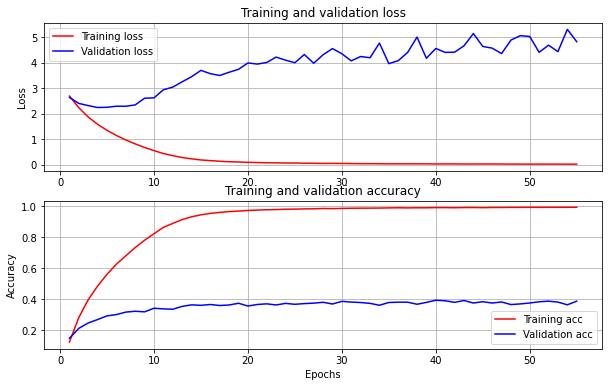

In [ ]:

# 128
#@title graph of training loss and  accuracy, and validation loss and accuracy { form-width: "200px" }
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()


plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    figure = plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    # plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        # plt.text(j,i,format(cm[i,j],'.2%'),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')
        # plt.text(j,i,format(cm[i,j],'.2f'),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')
        plt.text(j,i,format(''),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# 128
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# load and test
# supposed to be named as syno_aug_train_tweets_128.h5
model.load_weights('/content/drive/MyDrive/Personality_classifier/model/syno_aug_train_processed_tweets_128_v1.h5')
pred_prob=model.predict(test_input) 
y_pred=np.argmax(pred_prob, axis=1)
y_test=np.argmax(test_labels, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[347 130 108  16  15  11   1   1 146  40 128  35  15   3   8   1]
 [ 37 396 109  15   5   4  11   1 155  74 128  81  28   9  16   0]
 [ 21  73 326  19   6   2   2   1  98  21  80  43  14   0  20   1]
 [ 14  48  43 155   3   8   2   1  60  26  85  46  12   4  11   4]
 [ 12  27  25   3 118   3   0   0  39  10  16   6  12   8   5   0]
 [ 11  14  11   5   1  72   0   0  17  10  10  11   3   3   3   1]
 [ 15  40  44   1   4   1  60   1  26   4  27  14   9   2  10   0]
 [  3  10   4   1   1   1   1   8   5   2  11   4   1   0   0   0]
 [ 82 156 126  14  12  12   7   1 827  87 228  95  43  16  33   5]
 [ 28 107  49  15  12   6   2   2 225 328 121  93  28  10  20   4]
 [ 40  93  95  28   3   6   2   1 171  63 558  87  23  18  20   2]
 [ 16  40  43  23   7   1   1   0  96  34 104 242   8   5  11   5]
 [  8  37  41   7   4   1   2   1  85  26  63  26 162   6   8   4]
 [  8  11  12  12   6   0   1   1  66  31  37  18   8  77   6   5]
 [ 14  32  38   7   4   0   2   0  87  17  78  27  10   5 147 

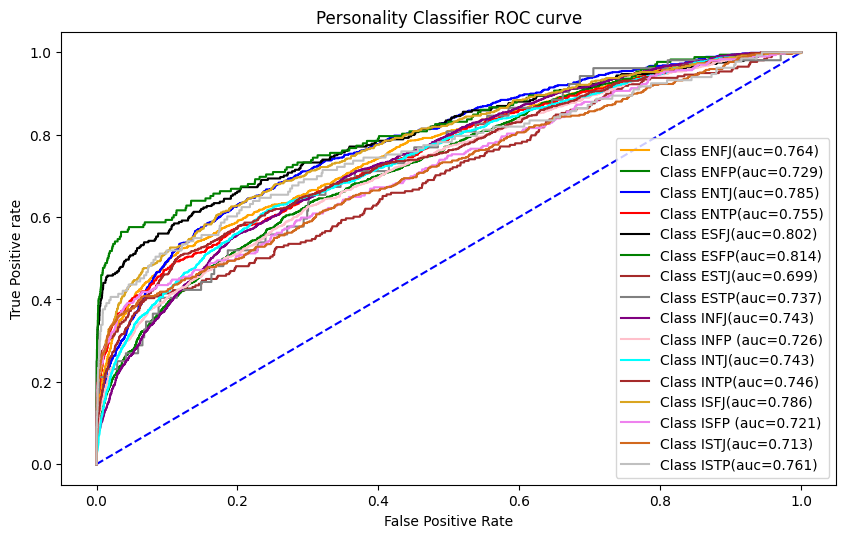

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)

# roc curve for classes

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# fpr, tpr, _ = roc_curve(y, pred)
# roc_auc = auc(fpr, tpr)
fpr = {}
tpr = {}
thresh ={}
# plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')

n_class = 16

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.figure(figsize=(10,6), dpi=100)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='Class '+lab_encoder.classes_[0]+'(auc=%0.3f)'%auc(fpr[0],tpr[0]))
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='Class '+lab_encoder.classes_[1]+'(auc=%0.3f)'%auc(fpr[1],tpr[1]))
plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class '+lab_encoder.classes_[2]+'(auc=%0.3f)'%auc(fpr[2],tpr[2]))
plt.plot(fpr[3], tpr[3], linestyle='-',color='red', label='Class '+lab_encoder.classes_[3]+'(auc=%0.3f)'%auc(fpr[3],tpr[3]))
plt.plot(fpr[4], tpr[4], linestyle='-',color='black', label='Class '+lab_encoder.classes_[4]+ '(auc=%0.3f)'%auc(fpr[4],tpr[4]))
plt.plot(fpr[5], tpr[5], linestyle='-',color='green', label='Class '+lab_encoder.classes_[5]+'(auc=%0.3f)'%auc(fpr[5],tpr[5]))
plt.plot(fpr[6], tpr[6], linestyle='-',color='brown', label='Class '+lab_encoder.classes_[6]+'(auc=%0.3f)'%auc(fpr[6],tpr[6]))
plt.plot(fpr[7], tpr[7], linestyle='-',color='gray', label='Class '+lab_encoder.classes_[7]+'(auc=%0.3f)'%auc(fpr[7],tpr[7]))
plt.plot(fpr[8], tpr[8], linestyle='-',color='purple', label='Class '+lab_encoder.classes_[8]+'(auc=%0.3f)'%auc(fpr[8],tpr[8]))
plt.plot(fpr[9], tpr[9], linestyle='-',color='pink', label='Class '+lab_encoder.classes_[9]+' (auc=%0.3f)'%auc(fpr[9],tpr[9]))
plt.plot(fpr[10], tpr[10], linestyle='-',color='aqua', label='Class '+lab_encoder.classes_[10]+'(auc=%0.3f)'%auc(fpr[10],tpr[10]))
plt.plot(fpr[11], tpr[11], linestyle='-',color='brown', label='Class '+lab_encoder.classes_[11]+'(auc=%0.3f)'%auc(fpr[11],tpr[11]))
plt.plot(fpr[12], tpr[12], linestyle='-',color='goldenrod', label='Class '+lab_encoder.classes_[12]+'(auc=%0.3f)'%auc(fpr[12],tpr[12]))
plt.plot(fpr[13], tpr[13], linestyle='-',color='violet', label='Class '+lab_encoder.classes_[13]+' (auc=%0.3f)'%auc(fpr[13],tpr[13]))
plt.plot(fpr[14], tpr[14], linestyle='-',color='chocolate', label='Class '+lab_encoder.classes_[14]+'(auc=%0.3f)'%auc(fpr[14],tpr[14]))
plt.plot(fpr[15], tpr[15], linestyle='-',color='silver', label='Class '+lab_encoder.classes_[15]+'(auc=%0.3f)'%auc(fpr[15],tpr[15]))
plt.title('Personality Classifier ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Personality Classifier ROC',dpi=500); 

Confusion matrix


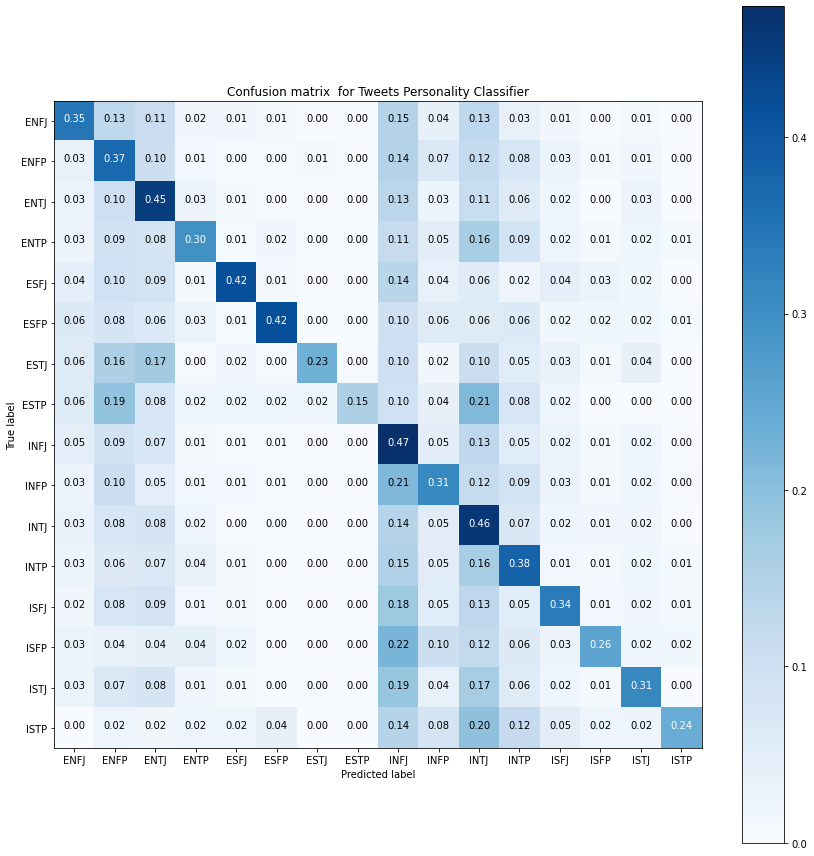

In [ ]:
# 128
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)
#only 480
# Compute confusion matrix
cnf_matrix = cm
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot confusion matrix

title="Tweets Personality Classifier"
plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,title=('Confusion matrix  for %s' % title)) 


Confusion matrix


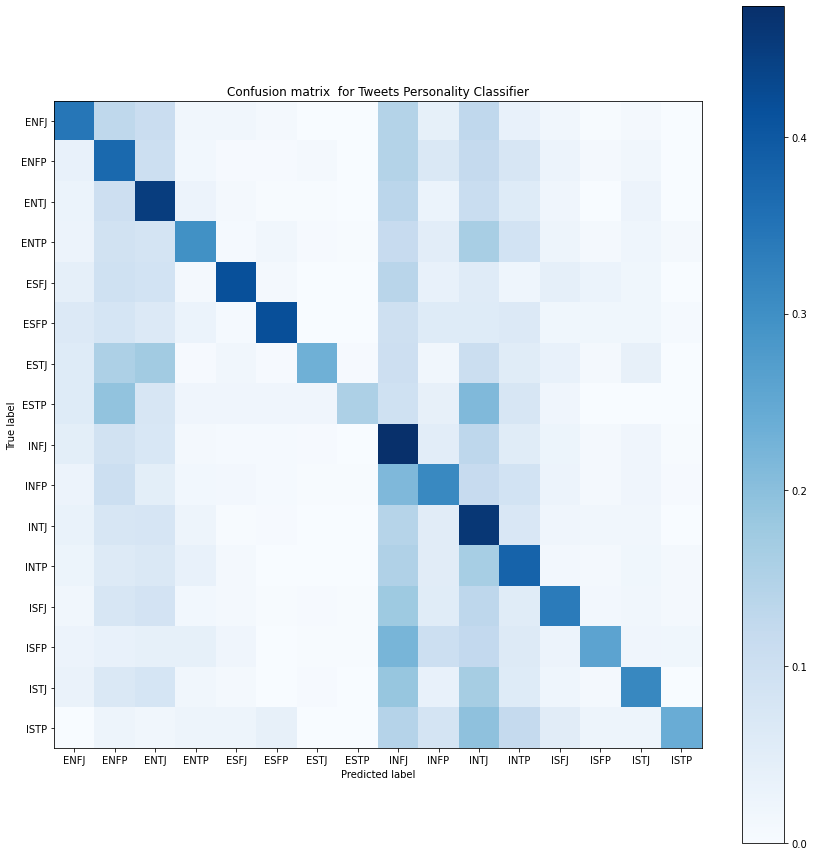

In [ ]:
# 128
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)
#only 480
# Compute confusion matrix
cnf_matrix = cm
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot confusion matrix

title="Tweets Personality Classifier"
plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,title=('Confusion matrix  for %s' % title)) 


In [ ]:
# 128
#@title classification report { form-width: "200px" }
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.35      0.42      1005
           1       0.33      0.37      0.35      1069
           2       0.30      0.45      0.36       727
           3       0.48      0.30      0.37       522
           4       0.58      0.42      0.48       284
           5       0.54      0.42      0.47       172
           6       0.64      0.23      0.34       258
           7       0.42      0.15      0.23        52
           8       0.39      0.47      0.43      1744
           9       0.42      0.31      0.36      1050
          10       0.33      0.46      0.38      1210
          11       0.29      0.38      0.33       636
          12       0.42      0.34      0.38       481
          13       0.46      0.26      0.33       299
          14       0.46      0.31      0.37       468
          15       0.50      0.24      0.32       133

    accuracy                           0.38     10110
   macro avg       0.44   

### 3.7.3)  128_seq_len Synonym augmented whole data

#### 3.7.3.1 ) Train Synonym augmented whole data  sequence length of 128

In [ ]:
train_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_before_split_train_tweets_128.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_before_split_validation_tweets_128.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_before_split_test_tweets_128.csv'

train_df=pd.read_csv(train_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)
print(train_df.shape, val_df.shape, test_df.shape)

(48416, 3) (10375, 3) (10375, 3)


In [ ]:
#@title Encode train, validation and test data and convert to one hote encode { form-width: "200px" }
print("train_input encoding starts...")
train_input = input_encode(train_df.posts.values, tokenizer, max_len=max_len)
train_labels= tf.keras.utils.to_categorical(train_df.type_encoding.values, num_classes=number_of_classes)
print("train_input encoding End")

print("val_input encoding starts...")
val_input=input_encode(val_df.posts.values, tokenizer, max_len=max_len)
val_labels= tf.keras.utils.to_categorical(val_df.type_encoding.values, num_classes=number_of_classes)
print("valinput encoding End")

print("test_input encoding starts...")
test_input = input_encode(test_df.posts.values, tokenizer, max_len=max_len)
test_labels= tf.keras.utils.to_categorical(test_df.type_encoding.values, num_classes=number_of_classes)
print("test_input encoding End")

train_input encoding starts...
train_input encoding End
val_input encoding starts...
valinput encoding End
test_input encoding starts...
test_input encoding End


In [ ]:
# saving the encoded inputs
# pickle used to transform complex object to byte stream and vice versa with the same intenal structure
import pickle
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_128/train_input.pickle','wb') as pkl_train:
  pickle.dump(train_input,pkl_train)

with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_128/val_input.pickle','wb') as pkl_val:
  pickle.dump(val_input, pkl_val)
              
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_128/test_input.pickle','wb') as pkl_test:
  pickle.dump(test_input, pkl_test)
              

In [ ]:
import pickle
# load the encoded input
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_128/train_input.pickle', 'rb')as pkl_train:
  train_input=pickle.load(pkl_train)
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_128/val_input.pickle', 'rb')as pkl_val:
  val_input=pickle.load(pkl_val)
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_128/test_input.pickle', 'rb')as pkl_test:
  test_input=pickle.load(pkl_test)

In [ ]:
# save checkpoint 
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Personality_classifier/model/syno_aug_before_split_tweets_128.h5', monitor='val_accuracy', save_best_only=True, verbose=1)#synonym only


earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, verbose=1)


In [ ]:
#@title Model training { form-width: "200px" }
#syno_aug_before_split_tweets_128
train_history = model.fit(
    train_input, train_labels, 
    validation_data=(val_input, val_labels),
    epochs=epochs,
    callbacks=[checkpoint, earlystopping],
    batch_size=batch_size,
    workers=1)

Epoch 1/150
6052/6052 [==============================] - ETA: 0s - loss: 2.6585 - accuracy: 0.1412
Epoch 1: val_accuracy improved from -inf to 0.24414, saving model to /content/drive/MyDrive/Personality_classifier/model/syno_aug_before_split_tweets_128.h5
6052/6052 [==============================] - 575s 92ms/step - loss: 2.6585 - accuracy: 0.1412 - val_loss: 2.3470 - val_accuracy: 0.2441
Epoch 2/150
6052/6052 [==============================] - ETA: 0s - loss: 2.2804 - accuracy: 0.2703
Epoch 2: val_accuracy improved from 0.24414 to 0.33330, saving model to /content/drive/MyDrive/Personality_classifier/model/syno_aug_before_split_tweets_128.h5
6052/6052 [==============================] - 563s 93ms/step - loss: 2.2804 - accuracy: 0.2703 - val_loss: 2.0829 - val_accuracy: 0.3333
Epoch 3/150
6052/6052 [==============================] - ETA: 0s - loss: 1.9764 - accuracy: 0.3605
Epoch 3: val_accuracy improved from 0.33330 to 0.39634, saving model to /content/drive/MyDrive/Personality_classif

#### 3.7.3.2)  Evaluate Synonym augmented whole data sequence length of 128

In [ ]:

# save history
history_path='/content/drive/MyDrive/Model_histories/my_history_syno_aug_before_split_tweets_128.npy'
np.save(history_path,train_history.history)

In [ ]:
# load history dic
history=np.load(history_path,allow_pickle='TRUE').item()

In [ ]:
# save history as dic
np.save('my_history.npy',train_history.history)

In [ ]:
# load history dic
history=np.load('my_history.npy',allow_pickle='TRUE').item()
history_dict=history

In [ ]:
# syno_aug_before_split_tweets_128
#@title Model traing history { form-width: "200px" }
history_dict = train_history .history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


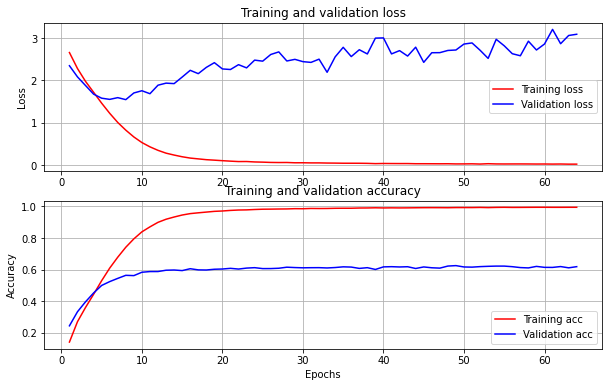

In [ ]:
# syno_aug_before_split_tweets_128
#@title graph of training loss and  accuracy, and validation loss and accuracy { form-width: "200px" }
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    figure = plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    # plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        # plt.text(j,i,format(cm[i,j],'.2%'),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')
        # plt.text(j,i,format(cm[i,j],'.2f'),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')
        plt.text(j,i,format(''),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# syno_aug_before_split_tweets_128
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# load and test
model.load_weights('/content/drive/MyDrive/Personality_classifier/model/syno_aug_before_split_tweets_128.h5')
pred_prob=model.predict(test_input) 
y_pred=np.argmax(pred_prob, axis=1)
y_test=np.argmax(test_labels, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[385  48  29   6   8   9   8   3 120  58  81  15   4   1   4   1]
 [ 81 232  38   6   5   8   9   0 139  74  85  21  24   8   7   0]
 [ 77  48 148  17   7   6   4   2  55  40  83  26  16   4   9   0]
 [ 18  23  10 408   4   4   3   2  33  30  53  17   8   3   2   0]
 [  5   9   7   2 306   1   5   0  19  10   3   2   3   4   1   0]
 [  3   2   1   1   1 521   0   1   2   3   0   2   0   0   0   0]
 [ 10   6   5   0   1   1 487   0   0   4   7   1   1   2   3   0]
 [  1   0   0   0   0   0   0 542   0   0   0   0   0   0   0   0]
 [125  71  15   5  15   6   8   0 647 136 133  25  28  12  14   4]
 [ 57  48  11  16   8  10   2   3 146 371  89  33  15  16   7   2]
 [ 70  39  26  13   7   4  10   5 152  79 446  24  20  10   9   1]
 [ 32  19  10  19   2   4   2   2  66  88  92 148   5   9   3   7]
 [ 34   7  15   4   3   9   5   5  67  21  23   6 420  14   8   2]
 [  4   5   4   1   5   2   0   0  27  17   9   5   6 336   3   2]
 [ 13  10   9   8   5   0   4   2  54  21  40  10  13   5 411 

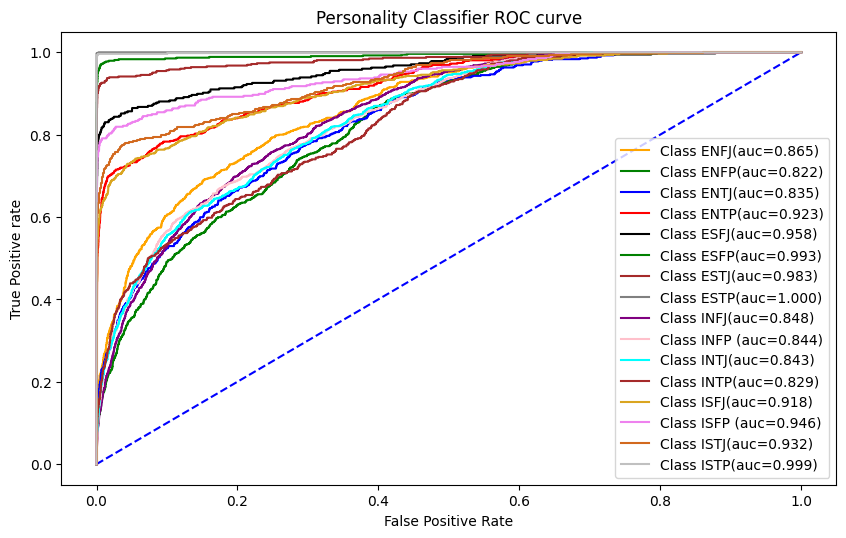

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)

# roc curve for classes

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# fpr, tpr, _ = roc_curve(y, pred)
# roc_auc = auc(fpr, tpr)
fpr = {}
tpr = {}
thresh ={}
# plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')

n_class = 16

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.figure(figsize=(10,6), dpi=100)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='Class '+lab_encoder.classes_[0]+'(auc=%0.3f)'%auc(fpr[0],tpr[0]))
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='Class '+lab_encoder.classes_[1]+'(auc=%0.3f)'%auc(fpr[1],tpr[1]))
plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class '+lab_encoder.classes_[2]+'(auc=%0.3f)'%auc(fpr[2],tpr[2]))
plt.plot(fpr[3], tpr[3], linestyle='-',color='red', label='Class '+lab_encoder.classes_[3]+'(auc=%0.3f)'%auc(fpr[3],tpr[3]))
plt.plot(fpr[4], tpr[4], linestyle='-',color='black', label='Class '+lab_encoder.classes_[4]+ '(auc=%0.3f)'%auc(fpr[4],tpr[4]))
plt.plot(fpr[5], tpr[5], linestyle='-',color='green', label='Class '+lab_encoder.classes_[5]+'(auc=%0.3f)'%auc(fpr[5],tpr[5]))
plt.plot(fpr[6], tpr[6], linestyle='-',color='brown', label='Class '+lab_encoder.classes_[6]+'(auc=%0.3f)'%auc(fpr[6],tpr[6]))
plt.plot(fpr[7], tpr[7], linestyle='-',color='gray', label='Class '+lab_encoder.classes_[7]+'(auc=%0.3f)'%auc(fpr[7],tpr[7]))
plt.plot(fpr[8], tpr[8], linestyle='-',color='purple', label='Class '+lab_encoder.classes_[8]+'(auc=%0.3f)'%auc(fpr[8],tpr[8]))
plt.plot(fpr[9], tpr[9], linestyle='-',color='pink', label='Class '+lab_encoder.classes_[9]+' (auc=%0.3f)'%auc(fpr[9],tpr[9]))
plt.plot(fpr[10], tpr[10], linestyle='-',color='aqua', label='Class '+lab_encoder.classes_[10]+'(auc=%0.3f)'%auc(fpr[10],tpr[10]))
plt.plot(fpr[11], tpr[11], linestyle='-',color='brown', label='Class '+lab_encoder.classes_[11]+'(auc=%0.3f)'%auc(fpr[11],tpr[11]))
plt.plot(fpr[12], tpr[12], linestyle='-',color='goldenrod', label='Class '+lab_encoder.classes_[12]+'(auc=%0.3f)'%auc(fpr[12],tpr[12]))
plt.plot(fpr[13], tpr[13], linestyle='-',color='violet', label='Class '+lab_encoder.classes_[13]+' (auc=%0.3f)'%auc(fpr[13],tpr[13]))
plt.plot(fpr[14], tpr[14], linestyle='-',color='chocolate', label='Class '+lab_encoder.classes_[14]+'(auc=%0.3f)'%auc(fpr[14],tpr[14]))
plt.plot(fpr[15], tpr[15], linestyle='-',color='silver', label='Class '+lab_encoder.classes_[15]+'(auc=%0.3f)'%auc(fpr[15],tpr[15]))
plt.title('Personality Classifier ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Personality Classifier ROC',dpi=500); 

Confusion matrix


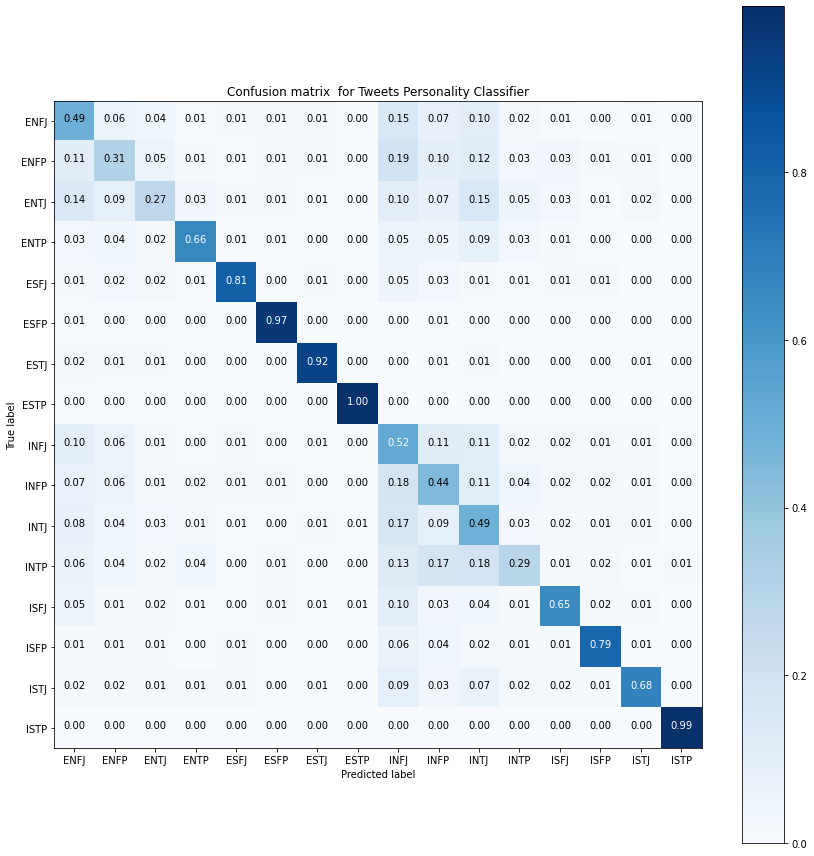

In [ ]:
# syno_aug_before_split_tweets_128
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)
#only 480
# Compute confusion matrix
cnf_matrix = cm
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot confusion matrix

title="Tweets Personality Classifier"
plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,title=('Confusion matrix  for %s' % title)) 


Confusion matrix


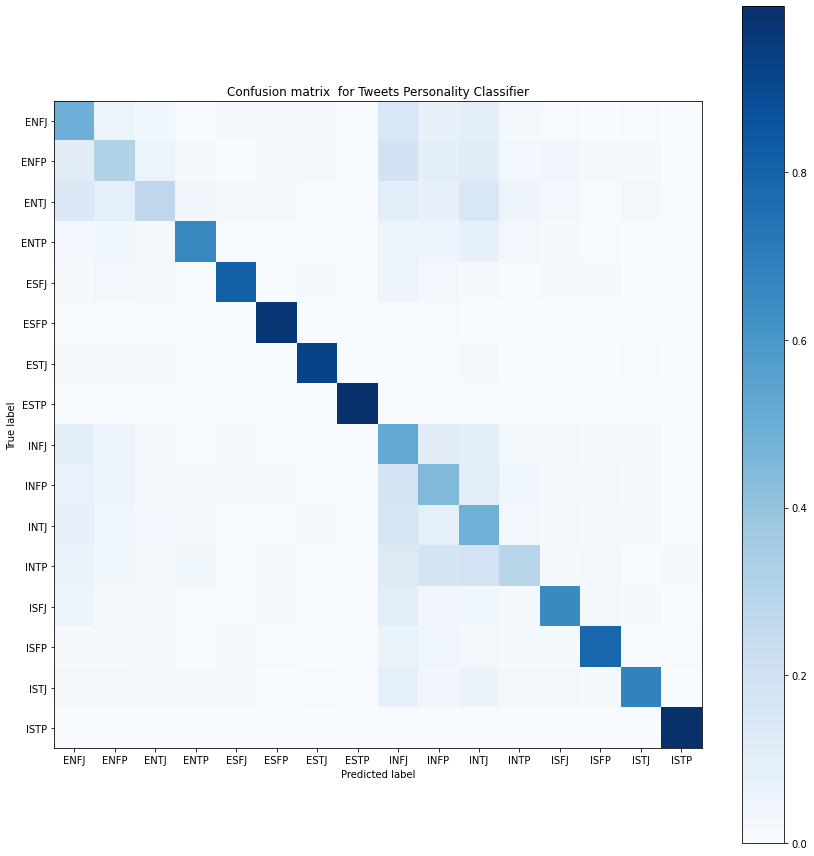

In [ ]:
# syno_aug_before_split_tweets_128
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)
#only 480
# Compute confusion matrix
cnf_matrix = cm
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot confusion matrix

title="Tweets Personality Classifier"
plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,title=('Confusion matrix  for %s' % title)) 


In [ ]:
# syno_aug_before_split_tweets_128
#@title classification report { form-width: "200px" }
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.49      0.45       780
           1       0.41      0.31      0.36       737
           2       0.45      0.27      0.34       542
           3       0.81      0.66      0.73       618
           4       0.81      0.81      0.81       377
           5       0.89      0.97      0.93       537
           6       0.89      0.92      0.91       528
           7       0.96      1.00      0.98       543
           8       0.42      0.52      0.47      1244
           9       0.39      0.44      0.42       834
          10       0.39      0.49      0.43       915
          11       0.44      0.29      0.35       508
          12       0.75      0.65      0.70       643
          13       0.79      0.79      0.79       426
          14       0.85      0.68      0.76       605
          15       0.97      0.99      0.98       538

    accuracy                           0.61     10375
   macro avg       0.66   

In [ ]:
#syno_aug_before_split_tweets_128
acc= model.evaluate(test_input,test_labels )

325/325 [==============================] - 29s 91ms/step - loss: 2.7889 - accuracy: 0.6114


### 3.7.4) 512_seq_len Synonym augmented whole data 

#### 3.7.4.1)  Train Synonym augmented whole data sequence length of 512

In [ ]:
# path
train_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_before_split_train_tweets_512.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_before_split_validation_tweets_512.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_before_split_test_tweets_512.csv'

train_df=pd.read_csv(train_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)
print(train_df.shape, val_df.shape, test_df.shape)

(16362, 3) (3506, 3) (3507, 3)


In [ ]:
#@title Encode train, validation and test data and convert to one hote encode { form-width: "200px" }
print("train_input encoding starts...")
# train_input = input_encode(train_df.posts.values, tokenizer, max_len=max_len)
train_labels= tf.keras.utils.to_categorical(train_df.type_encoding.values, num_classes=number_of_classes)
print("train_input encoding End")

print("val_input encoding starts...")
# val_input=input_encode(val_df.posts.values, tokenizer, max_len=max_len)
val_labels= tf.keras.utils.to_categorical(val_df.type_encoding.values, num_classes=number_of_classes)
print("valinput encoding End")

print("test_input encoding starts...")
# test_input = input_encode(test_df.posts.values, tokenizer, max_len=max_len)
test_labels= tf.keras.utils.to_categorical(test_df.type_encoding.values, num_classes=number_of_classes)
print("test_input encoding End")

train_input encoding starts...
train_input encoding End
val_input encoding starts...
valinput encoding End
test_input encoding starts...
test_input encoding End


In [ ]:
# saving the encoded inputs
# pickle used to transform complex object to byte stream and vice versa with the same intenal structure
import pickle
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/train_input.pickle','wb') as pkl_train:
  pickle.dump(train_input,pkl_train)

with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/val_input.pickle','wb') as pkl_val:
  pickle.dump(val_input, pkl_val)
              
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/test_input.pickle','wb') as pkl_test:
  pickle.dump(test_input, pkl_test)
              

In [ ]:
import pickle
# load the encoded input
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/train_input.pickle', 'rb')as pkl_train:
  train_input=pickle.load(pkl_train)
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/val_input.pickle', 'rb')as pkl_val:
  val_input=pickle.load(pkl_val)
with open('/content/drive/MyDrive/Personality_classifier/dataset/tweets/pickle/aug_whole_tweets_512/test_input.pickle', 'rb')as pkl_test:
  test_input=pickle.load(pkl_test)

In [ ]:
# save checkpoint 
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Personality_classifier/model/yno_aug_before_split_tweets_512.h5', monitor='val_accuracy', save_best_only=True, verbose=1)#synonym only
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, verbose=1)


In [ ]:
#@title Model training { form-width: "200px" }
#best tweets_df
train_history = model.fit(
    train_input, train_labels, 
    validation_data=(val_input, val_labels),
    epochs=epochs,
    callbacks=[checkpoint, earlystopping],
    batch_size=batch_size,
    workers=1)

Epoch 1/150
1637/1637 [==============================] - ETA: 0s - loss: 2.7752 - accuracy: 0.0808
Epoch 1: val_accuracy improved from -inf to 0.13263, saving model to /content/drive/MyDrive/Personality_classifier/model/yno_aug_before_split_tweets_512.h5
1637/1637 [==============================] - 708s 422ms/step - loss: 2.7752 - accuracy: 0.0808 - val_loss: 2.6922 - val_accuracy: 0.1326
Epoch 2/150
1637/1637 [==============================] - ETA: 0s - loss: 2.6578 - accuracy: 0.1320
Epoch 2: val_accuracy improved from 0.13263 to 0.20508, saving model to /content/drive/MyDrive/Personality_classifier/model/yno_aug_before_split_tweets_512.h5
1637/1637 [==============================] - 697s 426ms/step - loss: 2.6578 - accuracy: 0.1320 - val_loss: 2.5028 - val_accuracy: 0.2051
Epoch 3/150
1637/1637 [==============================] - ETA: 0s - loss: 2.3854 - accuracy: 0.2400
Epoch 3: val_accuracy improved from 0.20508 to 0.35168, saving model to /content/drive/MyDrive/Personality_classif

In this section, I Intended to train the model for large datset which is about 74K and I would like to show how much increasing the dataset by augmentation improves the performance. However, due to GPU augmentation limit I couldn't finish the traing. 

In [ ]:
#@title load after split { form-width: "200px" }
# load the splited value total of 74000
# path
train_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/_syno_all_train_tweets_512.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/_syno_all_validation_tweets_512.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/_syno_all_test_tweets_512.csv'
# save after split
train_df=pd.read_csv(train_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)
print(train_df.shape, val_df.shape, test_df.shape)

(51801, 3) (11100, 3) (11101, 3)


In [ ]:
train_history = model.fit(
    train_input, train_labels, 
    validation_data=(val_input, val_labels),
    epochs=epochs,
    callbacks=[checkpoint, earlystopping],
    batch_size=batch_size,
    workers=1) 

Epoch 1/150
8634/8634 [==============================] - ETA: 0s - loss: 2.4675 - accuracy: 0.1968
Epoch 1: val_accuracy improved from -inf to 0.43180, saving model to /content/drive/MyDrive/Personality_classifier/model/222_syno_aug_train_tweets_512.h5
8634/8634 [==============================] - 2323s 267ms/step - loss: 2.4675 - accuracy: 0.1968 - val_loss: 1.7772 - val_accuracy: 0.4318
Epoch 2/150
8634/8634 [==============================] - ETA: 0s - loss: 1.4999 - accuracy: 0.5215
Epoch 2: val_accuracy improved from 0.43180 to 0.66802, saving model to /content/drive/MyDrive/Personality_classifier/model/222_syno_aug_train_tweets_512.h5
8634/8634 [==============================] - 2308s 267ms/step - loss: 1.4999 - accuracy: 0.5215 - val_loss: 1.0323 - val_accuracy: 0.6680
Epoch 3/150
8634/8634 [==============================] - ETA: 0s - loss: 0.8814 - accuracy: 0.7215
Epoch 3: val_accuracy improved from 0.66802 to 0.82108, saving model to /content/drive/MyDrive/Personality_classifie

#### 3.7.4.2)  Evaluate Synonym augmented whole data sequence length of 512

In [ ]:
# syno_aug_before_split_tweets_512=yno_aug_before_split_tweets_512

In [ ]:
#evaluate model
# syno_aug_before_split_tweets_512
acc= model.evaluate(test_input,test_labels )

110/110 [==============================] - 43s 394ms/step - loss: 1.7073 - accuracy: 0.7496


In [ ]:
# save history
# syno_aug_before_split_tweets_512 
history_path='/content/drive/MyDrive/Model_histories/my_history_syno_aug_before_split_tweets_512.npy'
np.save(history_path,train_history.history)

In [ ]:
history_path='/content/drive/MyDrive/Model_histories/my_history_syno_aug_before_split_tweets_512.npy'
history=np.load(history_path,allow_pickle='TRUE').item()

In [ ]:
#@title Model traing history { form-width: "200px" }
# syno_aug_before_split_tweets_512
history_dict = history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
#@title Model traing history { form-width: "200px" }
# syno_aug_before_split_tweets_512
history_dict = train_history .history
print(history_dict.keys())

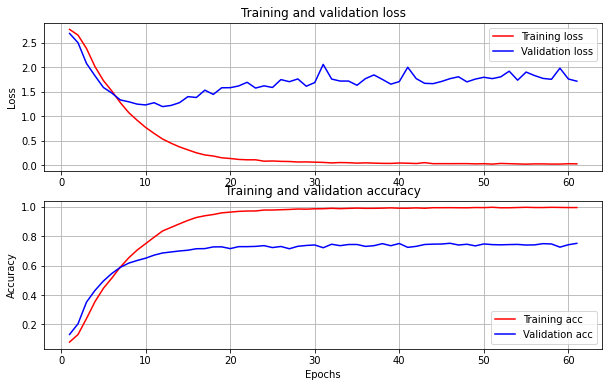

In [ ]:
#@title graph of training loss and  accuracy, and validation loss and accuracy { form-width: "200px" }
# syno_aug_before_split_tweets_512
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    figure = plt.figure(figsize=(12, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    # plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        # plt.text(j,i,format(cm[i,j],'.2%'),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')
        # plt.text(j,i,format(cm[i,j],'.2f'),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')
        plt.text(j,i,format(''),horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 75  33  12   1   3   0   3   0  20  12  12   0   1   0   2   0]
 [  9 117   4  12   6   1   2   1  13  21  11   4   2   1   5   1]
 [  7  16 192   1   2   1   0   0   5   3   7   0   0   0   3   0]
 [  0   5   1 190   0   0   1   0   1   2   9   3   2   0   1   0]
 [  0   0   0   0 214   1   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0 225   0   0   2   0   0   0   0   0   0   0]
 [  1   3   0   0   0   0 191   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0 230   0   0   0   0   0   0   0   0]
 [ 17  43  11   6   6   1   2   1 174  31  31   5   4   0   8   0]
 [  5  29   5   7   6   2   0   0  33  82  25   4   1   2   5   2]
 [ 10  43   9  10   1   2   4   1  28  16 111   4   1   0   8   0]
 [  4   2   6   5   0   1   1   0  11   8  23 171   0   1   3   0]
 [  0  14   4   1   5   0   1   0  13   6   4   0 126   0   6   0]
 [  0   1   0   1   0   0   0   0   3   3   5   0   0 202   0   0]
 [  3   8   0   2   0   0   1   0   6   4   6   0   0   0 150 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## syno_aug_before_split_tweets_512
model.load_weights('/content/drive/MyDrive/Personality_classifier/model/yno_aug_before_split_tweets_512.h5')
pred_prob=model.predict(test_input) 
y_pred=np.argmax(pred_prob, axis=1)
y_test=np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 75  33  12   1   3   0   3   0  20  12  12   0   1   0   2   0]
 [  9 117   4  12   6   1   2   1  13  21  11   4   2   1   5   1]
 [  7  16 192   1   2   1   0   0   5   3   7   0   0   0   3   0]
 [  0   5   1 190   0   0   1   0   1   2   9   3   2   0   1   0]
 [  0   0   0   0 214   1   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0 225   0   0   2   0   0   0   0   0   0   0]
 [  1   3   0   0   0   0 191   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0 230   0   0   0   0   0   0   0   0]
 [ 17  43  11   6   6   1   2   1 174  31  31   5   4   0   8   0]
 [  5  29   5   7   6   2   0   0  33  82  25   4   1   2   5   2]
 [ 10  43   9  10   1   2   4   1  28  16 111   4   1   0   8   0]
 [  4   2   6   5   0   1   1   0  11   8  23 171   0   1   3   0]
 [  0  14   4   1   5   0   1   0  13   6   4   0 126   0   6   0]
 [  0   1   0   1   0   0   0   0   3   3   5   0   0 202   0   0]
 [  3   8   0   2   0   0   1   0   6   4   6   0   0   0 150 

The AUC-ROC curve is only for binary classification problems. But we can extend it to multiclass classification problems by using the One vs All technique.

So, if we have three classes 0, 1, and 2, the ROC for class 0 will be generated as classifying 0 against not 0, i.e. 1 and 2. The ROC for class 1 will be generated as classifying 1 against not 1, and so on.Using this technique the ROC-AUC curve is used to visualize the performance of the model in addition to confusion matrix,recall and f1-score.

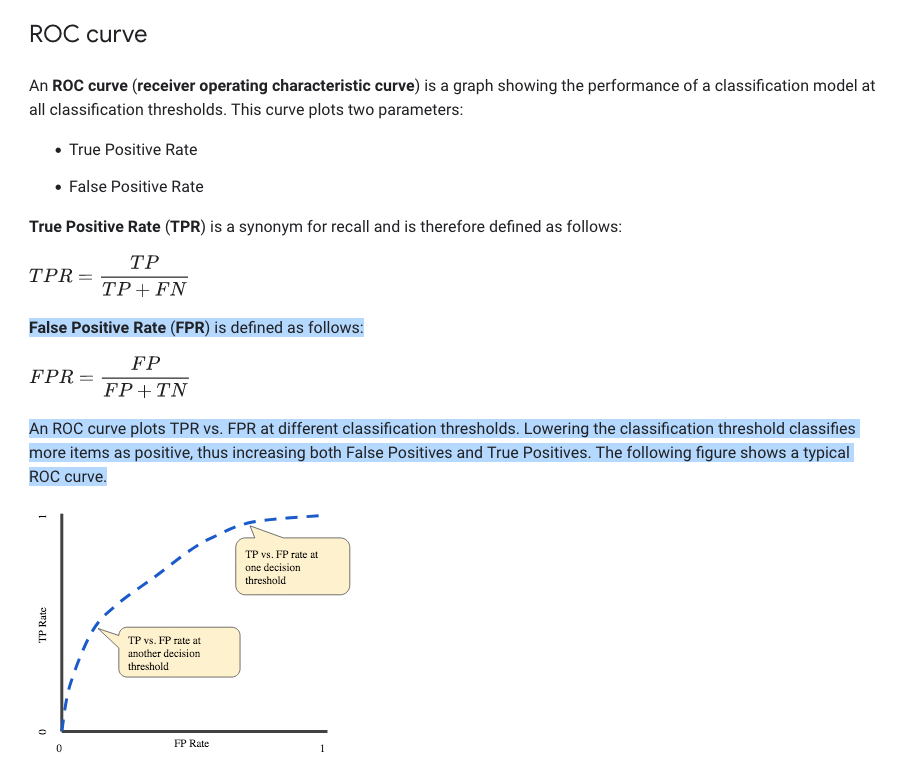

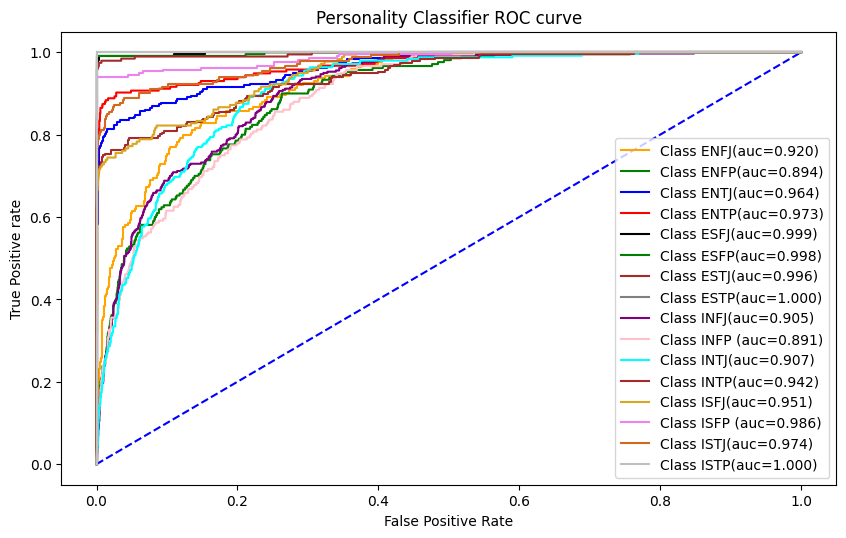

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)

# roc curve for classes

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# fpr, tpr, _ = roc_curve(y, pred)
# roc_auc = auc(fpr, tpr)
fpr = {}
tpr = {}
thresh ={}
# plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')

n_class = 16

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.figure(figsize=(10,6), dpi=100)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='Class '+lab_encoder.classes_[0]+'(auc=%0.3f)'%auc(fpr[0],tpr[0]))
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='Class '+lab_encoder.classes_[1]+'(auc=%0.3f)'%auc(fpr[1],tpr[1]))
plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class '+lab_encoder.classes_[2]+'(auc=%0.3f)'%auc(fpr[2],tpr[2]))
plt.plot(fpr[3], tpr[3], linestyle='-',color='red', label='Class '+lab_encoder.classes_[3]+'(auc=%0.3f)'%auc(fpr[3],tpr[3]))
plt.plot(fpr[4], tpr[4], linestyle='-',color='black', label='Class '+lab_encoder.classes_[4]+ '(auc=%0.3f)'%auc(fpr[4],tpr[4]))
plt.plot(fpr[5], tpr[5], linestyle='-',color='green', label='Class '+lab_encoder.classes_[5]+'(auc=%0.3f)'%auc(fpr[5],tpr[5]))
plt.plot(fpr[6], tpr[6], linestyle='-',color='brown', label='Class '+lab_encoder.classes_[6]+'(auc=%0.3f)'%auc(fpr[6],tpr[6]))
plt.plot(fpr[7], tpr[7], linestyle='-',color='gray', label='Class '+lab_encoder.classes_[7]+'(auc=%0.3f)'%auc(fpr[7],tpr[7]))
plt.plot(fpr[8], tpr[8], linestyle='-',color='purple', label='Class '+lab_encoder.classes_[8]+'(auc=%0.3f)'%auc(fpr[8],tpr[8]))
plt.plot(fpr[9], tpr[9], linestyle='-',color='pink', label='Class '+lab_encoder.classes_[9]+' (auc=%0.3f)'%auc(fpr[9],tpr[9]))
plt.plot(fpr[10], tpr[10], linestyle='-',color='aqua', label='Class '+lab_encoder.classes_[10]+'(auc=%0.3f)'%auc(fpr[10],tpr[10]))
plt.plot(fpr[11], tpr[11], linestyle='-',color='brown', label='Class '+lab_encoder.classes_[11]+'(auc=%0.3f)'%auc(fpr[11],tpr[11]))
plt.plot(fpr[12], tpr[12], linestyle='-',color='goldenrod', label='Class '+lab_encoder.classes_[12]+'(auc=%0.3f)'%auc(fpr[12],tpr[12]))
plt.plot(fpr[13], tpr[13], linestyle='-',color='violet', label='Class '+lab_encoder.classes_[13]+' (auc=%0.3f)'%auc(fpr[13],tpr[13]))
plt.plot(fpr[14], tpr[14], linestyle='-',color='chocolate', label='Class '+lab_encoder.classes_[14]+'(auc=%0.3f)'%auc(fpr[14],tpr[14]))
plt.plot(fpr[15], tpr[15], linestyle='-',color='silver', label='Class '+lab_encoder.classes_[15]+'(auc=%0.3f)'%auc(fpr[15],tpr[15]))
plt.title('Personality Classifier ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Personality Classifier ROC',dpi=500); 

Confusion matrix


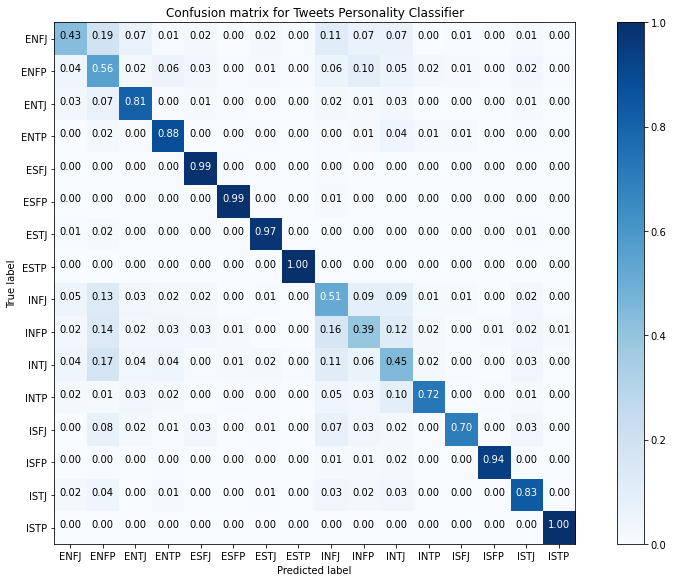

In [ ]:
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)

# syno_aug_before_split_tweets_512

# Compute confusion matrix
cnf_matrix = cm
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot confusion matrix

title="Tweets Personality Classifier"
plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,title=('Confusion matrix for %s' % title)) 

Confusion matrix


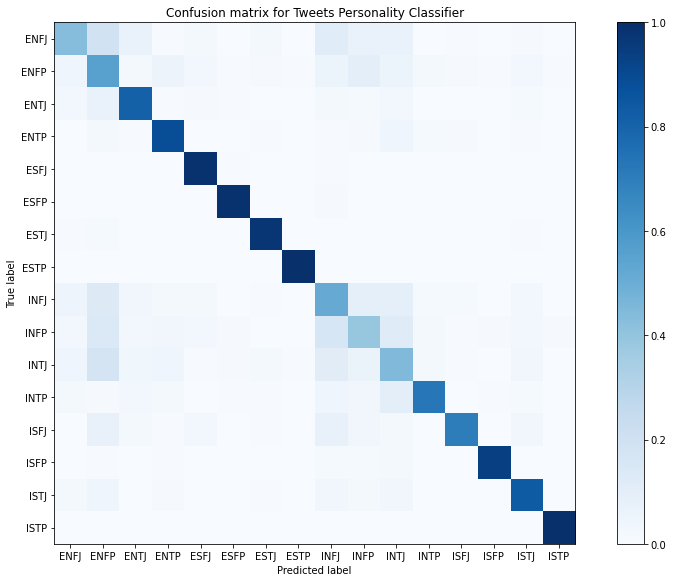

In [ ]:
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)

# syno_aug_before_split_tweets_512

# Compute confusion matrix
cnf_matrix = cm
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot confusion matrix

title="Tweets Personality Classifier"
plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,title=('Confusion matrix for %s' % title)) 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.43      0.49       174
           1       0.37      0.56      0.45       210
           2       0.79      0.81      0.80       237
           3       0.81      0.88      0.84       215
           4       0.88      0.99      0.93       216
           5       0.96      0.99      0.98       227
           6       0.93      0.97      0.95       196
           7       0.99      1.00      0.99       230
           8       0.56      0.51      0.54       340
           9       0.44      0.39      0.41       208
          10       0.45      0.45      0.45       248
          11       0.90      0.72      0.80       236
          12       0.92      0.70      0.79       180
          13       0.98      0.94      0.96       215
          14       0.78      0.83      0.81       180
          15       0.98      1.00      0.99       195

    accuracy                           0.75      3507
   macro avg       0.77   

## 3.8 Model Inference

In [ ]:

model.load_weights('/content/drive/MyDrive/Personality_classifier/model/syno_bert_aug_train_processed_tweets_v1.h5')

In [ ]:
from pandas.core.internals.managers import T
# inferencxe input data
inference_input_text1="Set the input and output formats.You need to know the input and output formats of your model. Use MLModelInputOutputSettings.Factory to set the input and output formats for the model inference engine. For example, the input format of an image classification model is a 1 x 224 x 224 x 3 array of the float type (indicating that one 224 x 224 RGB image is inferred). The output format is a float-type list with the length of 1001 (each value indicates the possibility that the image belongs to each of the 1001 categories). For this model, set the input and output formats as follows"
inference_input_text2="vuelto a instalar toda la mierda que yo hab a wanna draw queen historia and ymir princess me my dad was the sweetest and said of course pero si me pilla a la contra es en plan acabo de ver minutos en la serie"
inference_input_text3="array([23 here we are delicious man hard work])"

In [ ]:
# preprocess
cleaned_text=clean_text2(inference_input_text3)
cleaned_text

'ray delicious man hard work'

In [ ]:
print("Inference")
text_input_encoding = input_encode_inference(cleaned_text, tokenizer, max_len=max_len)
# test_labels= tf.keras.utils.to_categorical(test_df.type_encoding.values, num_classes=number_of_classes)
text_input_encoding

Inference


(array([[  101, 11265,  2100, 12395, 25459,  2050,  8840,  2140,  2748,
          5791,  2148,  3111,  2842,  4148,  2148,  8183,  5831, 12007,
          2078,  8183,  5831, 14566,  8569,  2290,  8183,  5831,  2176,
         14035,  2514,  2176, 14035,  8576, 14401,  7361,  2080,  2521,
          2591,  3006,  2342,  6350,  2793,  2521,  2185,  3265,  4512,
         24529,  5369,  6873, 10722,  6711,  1056,  4371,  4523,  3595,
          7290,  2305, 11323,  2851,  2048,  4406, 24529,  5369,  6873,
          2015,  2655,  6771,  3786, 12528,  2028,  2228,  8949,  3863,
          9273,  8454,  5177,  7729, 10617,  2175,  3113,  5875,  6926,
          2854,  2611, 23167, 12073,  4933,  2293,  3113,  2111,  2425,
          9119,  3335,  2131,  3723, 16042,  2113, 16042,  2113,  6904,
          4653,  2358,  2890,  6593, 12053,  3698,  2028,  4364,  4633,
          3786,  2611, 19387,  8840,  2140,  3648,  5353,  2524,  6016,
         24459, 16215, 21335,  3748,  2378, 25482,  9152, 23033,

In [ ]:
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                    'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)
lab_encoder.classes_

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype='<U4')

In [ ]:
y_pred1=model.predict(text_input_encoding)

y_pred2=np.argmax(y_pred1,axis=1)
print("predicted value = ",y_pred1)
print("Class encode = ",y_pred2)
print("class = ",lab_encoder.classes_[np.argmax(y_pred2)])
# [np.argmax(pred) for pred in model.predict(text_input_encoding)]

predicted value =  [[9.0130015e-07 3.3288975e-07 9.9999654e-01 8.7216286e-08 3.1845090e-07
  1.5692241e-07 4.0615770e-08 1.5823688e-09 1.2463929e-07 4.6570941e-07
  1.8419526e-07 6.6273657e-07 2.2052738e-08 1.3124330e-07 1.1607260e-07
  2.1039339e-08]]
Class encode =  [2]
class =  ENFJ


# 4  Tweets: Personality type classification by TFlite Model maker

## 4.1 Load libraries 

In [ ]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 616 kB 13.5 MB/s 
     |████████████████████████████████| 87 kB 7.7 MB/s 
     |████████████████████████████████| 3.4 MB 51.8 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 120 kB 73.3 MB/s 
     |████████████████████████████████| 1.1 MB 59.0 MB/s 
     |████████████████████████████████| 840 kB 57.1 MB/s 
     |████████████████████████████████| 6.4 MB 53.8 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 211 kB 76.7 MB/s 


In [ ]:
import numpy as np
from numpy.random import RandomState
import pandas as pd
import os

import tensorflow as tf


tf.compat.v1.enable_eager_execution()

from tflite_model_maker import model_spec
from tflite_model_maker import text_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.text_classifier import AverageWordVecSpec
from tflite_model_maker.text_classifier import DataLoader
from tflite_model_maker.text_classifier import BertClassifierSpec

# import tensorflow as tf
assert tf.__version__.startswith('2')
tf.get_logger().setLevel('ERROR')
# Data Analysis
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS


# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

##4.2 Load file

All datset used here are already cleaned, processed, augmented and split in section 3. 

In [ ]:
# 512 sequence length dataset
# path
train_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_before_split_train_tweets_512.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_before_split_validation_tweets_512.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_before_split_test_tweets_512.csv'

# load data
train_df=pd.read_csv(train_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)
print(train_df.shape, val_df.shape, test_df.shape)

(16362, 3) (3506, 3) (3507, 3)


In [ ]:
# 128 sequence length dataset
train_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_before_split_train_tweets_128.csv'
val_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_before_split_validation_tweets_128.csv'
test_df_path='/content/drive/MyDrive/Personality_classifier/dataset/tweets/processed_tweets_dataset/syno_aug_before_split_test_tweets_128.csv'


# load data
train_df=pd.read_csv(train_df_path)
val_df=pd.read_csv(val_df_path)
test_df=pd.read_csv(test_df_path)
print(train_df.shape, val_df.shape, test_df.shape)

(48416, 3) (10375, 3) (10375, 3)


##4.3 Visualize the data

(16362, 3)


type                                              posts  type_encoding
0  ENTJ  attempting enable google video voice gmail acc...              2
1  ISFP  shisha lounge dhyp bored right youngthrill vid...             13
2  ENFP  situations dr van til intense sometimes quite ...              1
3  INTJ  mike photoset year albums postal service track...             10
4  ISTJ  em lisboa like n te estou perceber ahahha sim ...             14

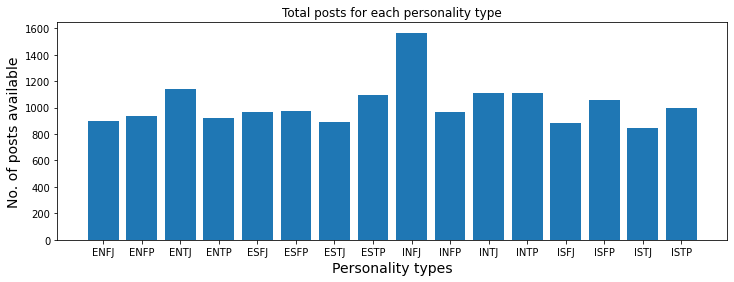

In [ ]:
#@title train data distribution bar graph { form-width: "200px" }
""" This shows the distribution of the dataset for each class bar chart"""
total = train_df.groupby(['type']).count()
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')
print(train_df.shape)
train_df.head()

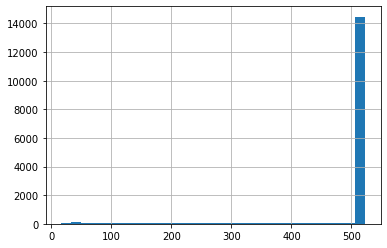

In [ ]:
seq_len = [len(i.split()) for i in train_df.posts.values]

pd.Series(seq_len).hist(bins = 30)

(3506, 3)


type                                              posts  type_encoding
0  ENTJ  attempting enable google video voice gmail acc...              2
1  ISFP  shisha lounge dhyp bored right youngthrill vid...             13
2  ENFP  situations dr van til intense sometimes quite ...              1
3  INTJ  mike photoset year albums postal service track...             10
4  ISTJ  em lisboa like n te estou perceber ahahha sim ...             14

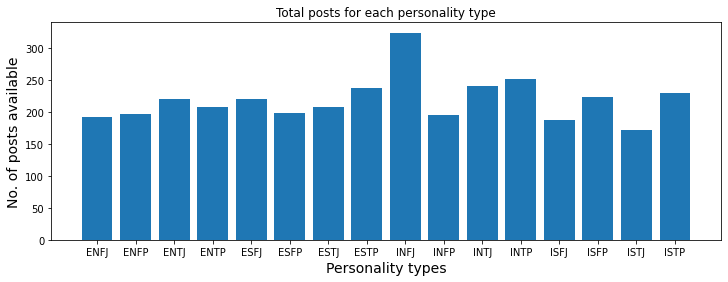

In [ ]:
#@title val data distribution bar graph { form-width: "200px" }
""" This shows the distribution of the dataset for each class bar chart"""
total = val_df.groupby(['type']).count()
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')
print(val_df.shape)
train_df.head()

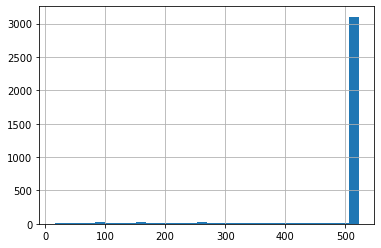

In [ ]:
seq_len = [len(i.split()) for i in val_df.posts.values]

pd.Series(seq_len).hist(bins = 30)

(3507, 3)


type                                              posts  type_encoding
0  INTP  complacent weather beautiful day outside reall...             11
1  ESFP  voiceover career even pressure finish characte...              5
2  ENTJ  used logic reasons fact make sense mgvcpfjcfz ...              2
3  ESFP  hello friend gvqo dear sweet mother astvatz sh...              5
4  INTJ  heeky bit four seasons vivaldi morning crazy n...             10

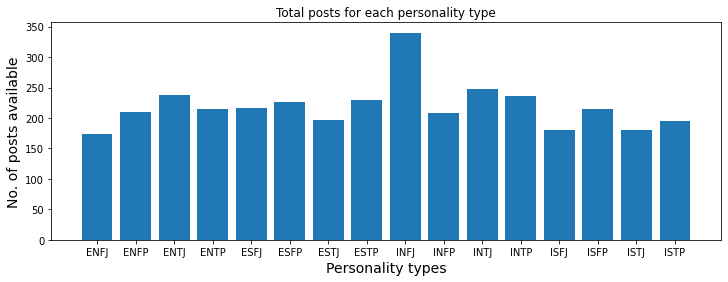

In [ ]:
#@title test data distribution bar graph { form-width: "200px" }
""" This shows the distribution of the dataset for each class bar chart"""
total = test_df.groupby(['type']).count()
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')
print(test_df.shape)
test_df.head()

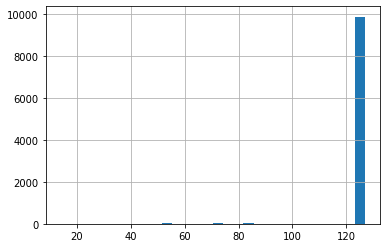

In [ ]:
seq_len = [len(i.split()) for i in test_df.posts.values]

pd.Series(seq_len).hist(bins = 30)

## 4.4 Model setup 

In [ ]:
# mobile bert spec or somehow model
spec_mobile_bert = model_spec.get('bert_classifier')
# spec_mobile_bert.learning_rate:1e-5
# spec_mobile_bert.dropout_rate:0.5


In [ ]:
# bert classifier spec
spec_bert = model_spec.get('bert_classifier')
spec_bert.seq_len = 512
spec_bert.learning_rate:1e-5
spec_bert.dropout_rate:0.5


In [ ]:
# traing data loader
print("train data loader starts....")
train_data = DataLoader.from_csv(
      filename=train_df_path,
      text_column='posts',
      label_column='type',
      model_spec=spec_mobile_bert,
      is_training=True)
print("train data loader ends")

# validation data loader
print("validation data loader starts....")
val_data = DataLoader.from_csv(
      filename=val_df_path,
      text_column='posts',
      label_column='type',
      model_spec=spec_mobile_bert,
      is_training=False)
print("validation data loader ends")

# test data loader
print("test data loader starts....")
test_data = DataLoader.from_csv(
      filename=test_df_path,
      text_column='posts',
      label_column='type',
      model_spec=spec_mobile_bert,
      is_training=False)
print("test data loader ends")



train data loader starts....


INFO:absl:Writing example 0 of 16362
INFO:absl:*** Example ***
INFO:absl:guid: syno_aug_before_split_train_tweets_512.csv-0
INFO:absl:tokens: [CLS] attempting enable google video voice gma ##il account hmm ##mm trying st ##ave sin ##us headache raiding work gigantic thing ad ##vil one little pill chewing mania ##cal ##ly coffee stir ##rer glad see everyone rallied around shan ##ia twain last night cm ##as lot songs waiting written heading downtown pick karen jean hunt iphone obama pilgrimage next stop fiesta italian pi ##zz ##eria hyde park obama ##s favorite got business card barack obama barber hyde park hair salon put nice ##r shirt dinner sometimes wishes grown strong nfl loyalty installed fr ##ing ipod touch iphone today virtual tennis game iphone v bb bold hungry like really hungry located proof like barack obama pal ##led around terrorists good company told parking attendant enjoy shopping part business [SEP]
INFO:absl:input_ids: 101 7161 9585 8224 2678 2376 20917 4014 4070 1701

train data loader ends
validation data loader starts....


INFO:absl:Writing example 0 of 3506
INFO:absl:*** Example ***
INFO:absl:guid: syno_aug_before_split_validation_tweets_512.csv-0
INFO:absl:tokens: [CLS] este lu ##gar think an ##z ##cy ##g e ##gi ##pt ##o al euro ##gr ##up ##o ya er ##es un vision ##ario pa ##ble ##te concord proficiency technologies make handling data extreme scale affordable and ##a que como al final tt ob ##ses ##ion ##ados confidence game el client ##e ha ##bla ##r de con luca pad ##ern ##i auditor ##io di ##st ##rito c le est ha ##cie ##ndo internacional yo que ll ##eva ##rm ##e de ##jad ##o x ##d ike ##a cop ##ia el bu ##eno v mono ##s ve ##r es ##pa va ##mo ##oo ##oo ##oo ##oo ##oo ##oo ##s de pre ##bo ##da los os di ##u aaa ##aa ##aa ##men s ##n ##q unlocked ace badge checking tennis [SEP]
INFO:absl:input_ids: 101 28517 11320 6843 2228 2019 2480 5666 2290 1041 5856 13876 2080 2632 9944 16523 6279 2080 8038 9413 2229 4895 4432 16843 6643 3468 2618 16557 26293 6786 2191 8304 2951 6034 4094 15184 1998 2050 10861 18

validation data loader ends
test data loader starts....


INFO:absl:Writing example 0 of 3507
INFO:absl:*** Example ***
INFO:absl:guid: syno_aug_before_split_test_tweets_512.csv-0
INFO:absl:tokens: [CLS] com ##pl ##ace ##nt weather beautiful day outside really appreciate something think husband earn respect c ##qi sometimes really det ##est auto ##cor ##re ##ct already fixed thanks x ##o bad day twitter today know difference honest fingers however mind good lord dense people serious reminds old motown sound happy des ##pic ##able ph ##ar ##rell williams decide going watch oscar ##s going use word public make certain forget l whoa read excerpt everything found beach cy ##nan jones looks spectacular reminds dead jim cr ##ace mantra winter season let storm rage cold never bothered anyway let go movie frozen make egg strata write full syn ##op ##isi ##s decisions decisions pac ##z ##ki day tomorrow pronounced po ##on sh ##key local polish tradition fat tuesday [SEP]
INFO:absl:input_ids: 101 4012 24759 10732 3372 4633 3376 2154 2648 2428 9120 2242

test data loader ends


## 4.5 Training 

In [ ]:
# Model creation and traing dataset: Augmented dataset 
model = text_classifier.create(train_data, model_spec=spec_mobile_bert,validation_data=val_data,batch_size=10, epochs=20)

1636/1636 [==============================] - 210s 114ms/step - loss: 2.6074 - test_accuracy: 0.1600 - val_loss: 2.2265 - val_test_accuracy: 0.3209
Epoch 2/2
1636/1636 [==============================] - 183s 111ms/step - loss: 1.7373 - test_accuracy: 0.4606 - val_loss: 1.6150 - val_test_accuracy: 0.4760
Epoch 3/3
1636/1636 [==============================] - 183s 111ms/step - loss: 0.8633 - test_accuracy: 0.7238 - val_loss: 1.4652 - val_test_accuracy: 0.5847
Epoch 4/4
1636/1636 [==============================] - 183s 111ms/step - loss: 0.3646 - test_accuracy: 0.8803 - val_loss: 1.5512 - val_test_accuracy: 0.6312
Epoch 5/5
1636/1636 [==============================] - 183s 111ms/step - loss: 0.1485 - test_accuracy: 0.9518 - val_loss: 2.0579 - val_test_accuracy: 0.6438
Epoch 6/6
1636/1636 [==============================] - 186s 113ms/step - loss: 0.0518 - test_accuracy: 0.9832 - val_loss: 2.3939 - val_test_accuracy: 0.6418
Epoch 7/7
1636/1636 [==============================] - 183s 111ms/st

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, None, 768)]               'input_mask[0][0]',         

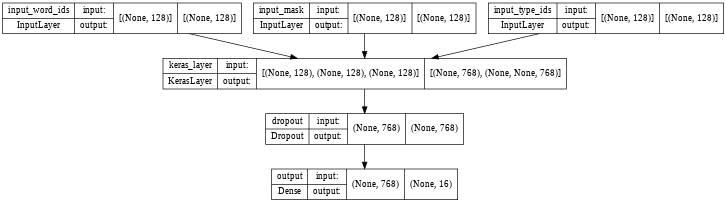

In [ ]:
# Model layes and input output structure
model.summary()
tf.keras.utils.plot_model(model.model, show_shapes=True, dpi=48)

In [ ]:
# uses Adamw optimizer and SparseCategoricalCrossentropy
model.model.optimizer

The AdamW optimizer decouples the weight decay from the optimization step. This means that the weight decay and learning rate can be optimized separately, i.e. changing the learning rate does not change the optimal weight decay.

In the common weight decay implementation in the Adam optimizer the weight decay is implicitly bound to the learning rate. This means that when optimizing the learning rate you will also need to find a new optimal weight decay for each learning rate you try. The AdamW optimizer decouples the weight decay from the optimization step. This means that the weight decay and learning rate can be optimized separately, i.e. changing the learning rate does not change the optimal weight decay. The result of this fix is a substantially improved generalization performance; models trained with AdamW using an annealing learning rate schedule achieve results on image recognition tasks (e.g. CIFAR-10 and ImageNet) that match the ones achieved with SGD + momentum

In [ ]:
# model loss function
model.model.loss

In [ ]:

model.model.history

In [ ]:
# model history keys
history_dict = model.model.history.history
print(history_dict.keys())

dict_keys(['loss', 'test_accuracy', 'val_loss', 'val_test_accuracy'])


1

In [ ]:

#@title graph of training loss and  accuracy, and validation loss and accuracy { form-width: "200px" }
acc = history_dict['test_accuracy']
val_acc = history_dict['val_test_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()

In [ ]:
# checking classes size
model.num_classes

16

In [ ]:
# class label indexes 
model.index_to_label

['ENFJ',
 'ENFP',
 'ENTJ',
 'ENTP',
 'ESFJ',
 'ESFP',
 'ESTJ',
 'ESTP',
 'INFJ',
 'INFP',
 'INTJ',
 'INTP',
 'ISFJ',
 'ISFP',
 'ISTJ',
 'ISTP']

In [ ]:
model.model_spec

## 4.6 Evaluation

In [ ]:
# Evaluation of the model
loss, acc = model.evaluate(test_data)

110/110 [==============================] - 10s 92ms/step - loss: 3.4536 - test_accuracy: 0.6667


## 4.7 Convert to tflite model

In [ ]:
# 512_aug_whole
model.export(export_dir='/content/drive/MyDrive/Personality_classifier/model/TFLITE/mobile_bert_model')

## 4.8 Inference from tweets

In [ ]:
import tweepy
from tweepy import OAuthHandler

# Please use your Twitter Developer keys here
# It is CENSORED
consumer_key = 'your consumer_key '
consumer_key_secret = 'your consumer_key_secret'
access_token = 'your access_token'
access_token_secret = 'your access_token_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
#getting user tweets

tweets = api.user_timeline('elonmusk', count=200) # 100 for real demo
tweets = [tweet.text for tweet in tweets]

In [ ]:
tweets

['🇩🇪🇩🇪 Danke Deutschland!! 🇩🇪🇩🇪',
 '@JaneidyEve @thesheetztweetz @QuiltyAnalytics New',
 '@ashleevance 🐍 🐓 🤔',
 '@ashleevance 🤣🤣',
 '@thesheetztweetz @QuiltyAnalytics First Starship orbital flight will be with Raptor 2 engines, as they are much mor… https://t.co/3uakDUR00h',
 '@thesheetztweetz @QuiltyAnalytics SpaceX default plan was ~65% of global launch mass to orbit this year. Incrementa… https://t.co/jBES8gHlWK',
 '@DivesTech Makes a huge difference to capital efficiency to localize production within a continent',
 'Excited to hand over the first production cars made by Giga Berlin-Brandenburg tomorrow!',
 '@RationalEtienne @BillyM2k 🤣',
 '@BillyM2k Ok, maybe I should play League then',
 '@DoctorJack16 Main Tesla subjects will be scaling to extreme size, which is needed to shift humanity away from foss… https://t.co/nkGyifi5SM',
 '@cz_binance Managed to throw him, but it cost me smashing my c5-c6 disc &amp; 8 years of mega back pain! Finally fixed with c5-c6 disc fusion.',
 '@cz_bi

In [ ]:
tweets

['@PPathole @Teslarati @13ericralph31 If we are able to make life self-sustaining on Mars, we will have passed one of… https://t.co/xR8C5TZTuQ',
 '@gurgavin https://t.co/MRxBaMhspM',
 '@engineers_feed 🤣',
 '@Teslarati @13ericralph31 Earth has been and will be smashed super hard by meteors over time. Not a question of if, just when.',
 '@Teslarati @13ericralph31 In 1992, comet Shoemaker-Levy smashed a hole in Jupiter the size of Earth https://t.co/nruaHoSIAQ',
 '@Teslarati @13ericralph31 This will be really important one day. \n\nMuch is made of meteor impacts that destroyed mo… https://t.co/nvJkWcpRkX',
 "RT @SpaceX: More photos from last night's Falcon 9 launch of @NASA's double asteroid redirection test → https://t.co/2ebfOrwNZZ https://t.c…",
 'RT @SpaceX: Deployment confirmed, @NASA’s DART is on its way to redirect an asteroid https://t.co/UTxkcJFcq0',
 'RT @SpaceX: Watch Falcon 9 launch @NASA’s DART mission – humanity’s first planetary defense test to redirect an asteroid https://

In [ ]:
combined_tweets = ''.join(tweets)
print(combined_tweets )

🇩🇪🇩🇪 Danke Deutschland!! 🇩🇪🇩🇪@JaneidyEve @thesheetztweetz @QuiltyAnalytics New@ashleevance 🐍 🐓 🤔@ashleevance 🤣🤣@thesheetztweetz @QuiltyAnalytics First Starship orbital flight will be with Raptor 2 engines, as they are much mor… https://t.co/3uakDUR00h@thesheetztweetz @QuiltyAnalytics SpaceX default plan was ~65% of global launch mass to orbit this year. Incrementa… https://t.co/jBES8gHlWK@DivesTech Makes a huge difference to capital efficiency to localize production within a continentExcited to hand over the first production cars made by Giga Berlin-Brandenburg tomorrow!@RationalEtienne @BillyM2k 🤣@BillyM2k Ok, maybe I should play League then@DoctorJack16 Main Tesla subjects will be scaling to extreme size, which is needed to shift humanity away from foss… https://t.co/nkGyifi5SM@cz_binance Managed to throw him, but it cost me smashing my c5-c6 disc &amp; 8 years of mega back pain! Finally fixed with c5-c6 disc fusion.@cz_binance https://t.co/SvZdL2Sk98@thebenbergman Working on it@spid

In [ ]:

s = ''.join(tweets)
print(s)

@PPathole @Teslarati @13ericralph31 If we are able to make life self-sustaining on Mars, we will have passed one of… https://t.co/xR8C5TZTuQ@gurgavin https://t.co/MRxBaMhspM@engineers_feed 🤣@Teslarati @13ericralph31 Earth has been and will be smashed super hard by meteors over time. Not a question of if, just when.@Teslarati @13ericralph31 In 1992, comet Shoemaker-Levy smashed a hole in Jupiter the size of Earth https://t.co/nruaHoSIAQ@Teslarati @13ericralph31 This will be really important one day. 

Much is made of meteor impacts that destroyed mo… https://t.co/nvJkWcpRkXRT @SpaceX: More photos from last night's Falcon 9 launch of @NASA's double asteroid redirection test → https://t.co/2ebfOrwNZZ https://t.c…RT @SpaceX: Deployment confirmed, @NASA’s DART is on its way to redirect an asteroid https://t.co/UTxkcJFcq0RT @SpaceX: Watch Falcon 9 launch @NASA’s DART mission – humanity’s first planetary defense test to redirect an asteroid https://t.co/bJFjL…About to launch asteroid defense 

In [ ]:
# clean tweets
clean_tweets=clean_text(combined_tweets)
clean_tweets

'nke deutschland new first starship orbital flight raptor engines much mor spacex default plan global launch mass orbit year incrementa makes huge difference capital efficiency localize production within continentexcited hand first production cars made giga berlin brandenburg tomorrow ok maybe play league main tesla subjects scaling extreme size needed shift humanity away foss managed throw cost smashing disc amp years mega back pain finally fixed disc fusion working six seat model x best imo times want offer variant heaviest falcon payload metric tons first time falcon first stage launched landed times ends cycle retribution'

In [ ]:

import pandas as pd  
# processed tweet or post as a list
list_one = [clean_tweets] 
# Type as list
list_two= ["INTP"]
# convert to dataframe
tweet_df = pd.DataFrame(list(zip(list_one, list_two)),
               columns =['posts', 'type'])
tweet_df

posts  type
0  nke deutschland new first starship orbital fli...  INTP

In [ ]:
# convert to csv file
tweet_df.to_csv('procecced_tweets_test.csv',index=False)

In [ ]:
# data loader
test_tweets = DataLoader.from_csv(
      filename='procecced_tweets_test.csv',
      text_column='posts',
      label_column='type',
      model_spec=spec_mobile_bert,
      is_training=False)

predict_top_k

predict_top_k(
    data, k=1, batch_size=32
)

Predicts the top-k predictions.

Args
data 	Data to be evaluated. Either an instance of DataLoader or just raw data entries such TF tensor or numpy array.
k 	Number of top results to be predicted.
batch_size 	Number of samples per evaluation step.

Returns
top k results. Each one is (label, probability). 

From: https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/text_classifier/TextClassifier

In [ ]:
print(model.predict_top_k(test_tweets,16,1))

[[('ENTP', 0.6820971), ('ESFJ', 0.27406424), ('ESFP', 0.011516071), ('ISTJ', 0.0062386696), ('ISFJ', 0.0033222707), ('ENTJ', 0.0030039314), ('INFP', 0.0029955055), ('ISTP', 0.0029647783), ('ENFJ', 0.0029497705), ('INTP', 0.0028580762), ('INTJ', 0.0026554894), ('ENFP', 0.0021990985), ('INFJ', 0.0015826059), ('ESTJ', 0.0007151326), ('ISFP', 0.00051113975), ('ESTP', 0.00032606546)]]


In [ ]:
print(model.predict_top_k(test_tweets,3,30))

[[('ENTP', 0.6820971), ('ESFJ', 0.27406424), ('ESFP', 0.011516071)]]


# 5 Model Performance Comparation

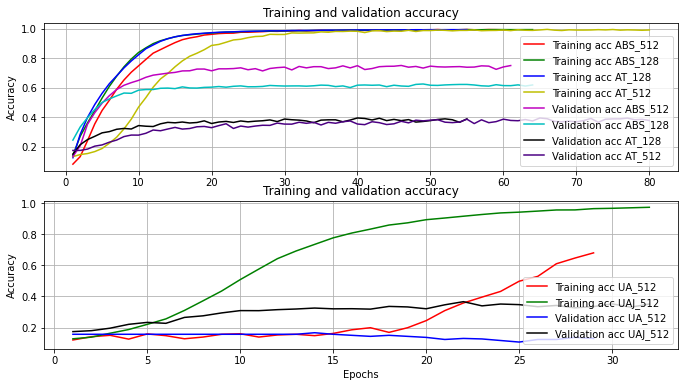

In [ ]:
'''
#@title graph of training loss and  accuracy, and validation loss and accuracy { form-width: "200px" }
'''
fig = plt.figure(figsize=(25, 6))
fig.tight_layout()
'''
# ‘b’ 	blue
# ‘g’ 	green
# ‘r’ 	red
# ‘c’ 	cyan
# ‘m’ 	magenta
# ‘y’ 	yellow
# ‘k’ 	black
# ‘w’ 	white
# ABS_512=syno_aug_before_split_tweets_512
# ABS_128=syno_aug_before_split_tweets_128
# AT_128=syno_aug_train__tweets_128
# AT_512=syno_aug_train__tweets_512
# UA_512=un_aug_512
# UAJ_512=un_aug_512_adjusted

'''

plt.subplot(2, 2, 1)
plt.plot(epochs1, acc1, 'r', label='Training acc ABS_512')
plt.plot(epochs2, acc2, 'g', label='Training acc ABS_128')
plt.plot(epochs3, acc3, 'b', label='Training acc AT_128')
plt.plot(epochs4, acc4, 'y', label='Training acc AT_512')
# plt.plot(epochs0, acc0, 'c', label='Training acc UA_512')
# plt.plot(epochs5, acc5, 'k', label='Training acc UAJ_512')
plt.plot(epochs1, val_acc1, 'm', label='Validation acc ABS_512')
plt.plot(epochs2, val_acc2, 'c', label='Validation acc ABS_128')
plt.plot(epochs3, val_acc3, 'k', label='Validation acc AT_128')
plt.plot(epochs4, val_acc4, 'indigo', label='Validation acc AT_512')
# plt.plot(epochs0, val_acc0, 'c', label='Validation acc UA_512')
# plt.plot(epochs5, val_acc5, 'k', label='Validation acc UAJ_512')
plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(epochs0, acc0, 'r', label='Training acc UA_512')
plt.plot(epochs5, acc5, 'g', label='Training acc UAJ_512')
plt.plot(epochs0, val_acc0, 'b', label='Validation acc UA_512')
plt.plot(epochs5, val_acc5, 'k', label='Validation acc UAJ_512')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()

In [ ]:
history_path0='/content/drive/MyDrive/Model_histories/my_history_0_tweets_512.npy'
history_path5='/content/drive/MyDrive/Model_histories/1_my_history_tweets_512.npy'


In [ ]:
# Tweets dataset
history_path1='/content/drive/MyDrive/Model_histories/my_history_syno_aug_before_split_tweets_512.npy'
history_path2='/content/drive/MyDrive/Model_histories/my_history_syno_aug_before_split_tweets_128.npy'
history_path3='/content/drive/MyDrive/Model_histories/my_history_syno_aug_train__tweets_128.npy'
history_path4='/content/drive/MyDrive/Model_histories/my_history_syno_aug_train__tweets_512.npy'


In [ ]:
history0=np.load(history_path0,allow_pickle='TRUE').item()
history5=np.load(history_path5,allow_pickle='TRUE').item()

In [ ]:

# load history dic Tweets dataset
history1=np.load(history_path1,allow_pickle='TRUE').item()
history2=np.load(history_path2,allow_pickle='TRUE').item()
history3=np.load(history_path3,allow_pickle='TRUE').item()
history4=np.load(history_path4,allow_pickle='TRUE').item()


In [ ]:
# Tweets dataset
acc1 = history1['accuracy']
acc2 = history2['accuracy']
acc3 = history3['accuracy']
acc4 = history4['accuracy']
acc0 = history0['accuracy']
acc5 = history5['accuracy']
val_acc1 = history1['val_accuracy']
val_acc2 = history2['val_accuracy']
val_acc3 = history3['val_accuracy']
val_acc4 = history4['val_accuracy']
val_acc0 = history0['val_accuracy']
val_acc5 = history5['val_accuracy']
loss1 = history1['loss']
loss2 = history2['loss']
loss3 = history3['loss']
loss4 = history4['loss']
loss0 = history0['loss']
loss5 = history5['loss']
val_loss1 = history1['val_loss']
val_loss2 = history2['val_loss']
val_loss3 = history3['val_loss']
val_loss4 = history4['val_loss']
val_loss0 = history0['val_loss']
val_loss5 = history5['val_loss']


epochs1 = range(1, len(acc1) + 1)
epochs2 = range(1, len(acc2) + 1)
epochs3 = range(1, len(acc3) + 1)
epochs4 = range(1, len(acc4) + 1)
epochs0 = range(1, len(acc0) + 1)
epochs5 = range(1, len(acc5) + 1)

print(epochs1)
print(epochs2)
print(epochs3)
print(epochs4)
print(epochs0)
print(epochs5)

range(1, 62)
range(1, 65)
range(1, 56)
range(1, 81)
range(1, 30)
range(1, 33)


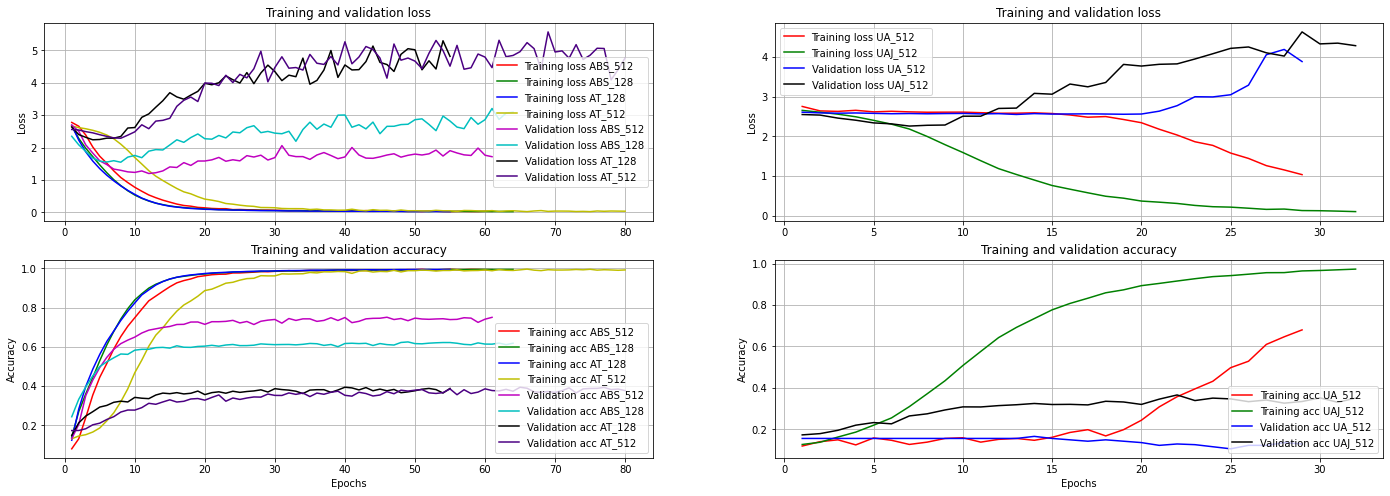

In [ ]:
'''
#@title graph of training loss and  accuracy, and validation loss and accuracy { form-width: "200px" }
'''
fig = plt.figure(figsize=(24, 8))
fig.tight_layout()
'''
# ‘b’ 	blue
# ‘g’ 	green
# ‘r’ 	red
# ‘c’ 	cyan
# ‘m’ 	magenta
# ‘y’ 	yellow
# ‘k’ 	black
# ‘w’ 	white
# ABS_512=syno_aug_before_split_tweets_512
# ABS_128=syno_aug_before_split_tweets_128
# AT_128=syno_aug_train__tweets_128
# AT_512=syno_aug_train__tweets_512
# UA_512=un_aug_512
# UAJ_512=un_aug_512_adjusted


# DS_1=syno_aug_train_cafe_reddit_512
# DS_2=un_aug_train_cafe_reddit_512
'''
plt.subplot(2, 2, 1)
# r is for "solid red line"
plt.plot(epochs1, loss1, 'r', label='Training loss ABS_512')
plt.plot(epochs2, loss2, 'g', label='Training loss ABS_128')
plt.plot(epochs3, loss3, 'b', label='Training loss AT_128')
plt.plot(epochs4, loss4, 'y', label='Training loss AT_512')
# plt.plot(epochs0, loss0, 'c', label='Training loss UA_512')
# plt.plot(epochs5, loss5, 'k', label='Training loss UAJ_512')
plt.plot(epochs1, val_loss1, 'm', label='Validation loss ABS_512')
plt.plot(epochs2, val_loss2, 'c', label='Validation loss ABS_128')
plt.plot(epochs3, val_loss3, 'k', label='Validation loss AT_128')
plt.plot(epochs4, val_loss4, 'indigo', label='Validation loss AT_512')
# plt.plot(epochs0, val_loss0, 'c', label='Validation loss UA_512')
# plt.plot(epochs5, val_loss5, 'k', label='Validation loss UAJ_512')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
# plt.plot(epochs_1, loss_1, 'r', label='Training loss DS_1')
# plt.plot(epochs_2, loss_2, 'g', label='Training loss DS_2')
plt.plot(epochs0, loss0, 'r', label='Training loss UA_512')
plt.plot(epochs5, loss5, 'g', label='Training loss UAJ_512')
# plt.plot(epochs_1, val_loss_1, 'r', label='Validation loss DS_1')
# plt.plot(epochs_2, val_loss_2, 'g', label='Validation loss DS_2')
plt.plot(epochs0, val_loss0, 'b', label='Validation loss UA_512')
plt.plot(epochs5, val_loss5, 'k', label='Validation loss UAJ_512')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()


plt.subplot(2, 2, 3)
plt.plot(epochs1, acc1, 'r', label='Training acc ABS_512')
plt.plot(epochs2, acc2, 'g', label='Training acc ABS_128')
plt.plot(epochs3, acc3, 'b', label='Training acc AT_128')
plt.plot(epochs4, acc4, 'y', label='Training acc AT_512')
# plt.plot(epochs0, acc0, 'c', label='Training acc UA_512')
# plt.plot(epochs5, acc5, 'k', label='Training acc UAJ_512')
plt.plot(epochs1, val_acc1, 'm', label='Validation acc ABS_512')
plt.plot(epochs2, val_acc2, 'c', label='Validation acc ABS_128')
plt.plot(epochs3, val_acc3, 'k', label='Validation acc AT_128')
plt.plot(epochs4, val_acc4, 'indigo', label='Validation acc AT_512')
# plt.plot(epochs0, val_acc0, 'c', label='Validation acc UA_512')
# plt.plot(epochs5, val_acc5, 'k', label='Validation acc UAJ_512')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()

plt.subplot(2, 2, 4)
# plt.plot(epochs_1, acc_1, 'r', label='Training acc DS_1')
# plt.plot(epochs_2, acc_2, 'g', label='Training acc DS_2')
plt.plot(epochs0, acc0, 'r', label='Training acc UA_512')
plt.plot(epochs5, acc5, 'g', label='Training acc UAJ_512')
# plt.plot(epochs_1, val_acc_1, 'r', label='Validation acc DS_1')
# plt.plot(epochs_2, val_acc_2, 'g', label='Validation acc DS_2')
plt.plot(epochs0, val_acc0, 'b', label='Validation acc UA_512')
plt.plot(epochs5, val_acc5, 'k', label='Validation acc UAJ_512')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()

In [ ]:
# #history_path='/content/drive/MyDrive/Model_histories/my_history_syno_aug_before_split_tweets_512_adagrad2.npy'
# history_path_Adagrad='/content/drive/MyDrive/Model_histories/my_history_syno_aug_before_split_tweets_512_adagrad.npy'
# history_path_SGD='/content/drive/MyDrive/Model_histories/my_history_syno_aug_before_split_tweets_512_SGD.npy'
# history_path_Adam='/content/drive/MyDrive/Model_histories/my_history_syno_aug_before_split_tweets_512.npy'#ADAM

# history_path_SGD='/content/drive/MyDrive/Model_histories/my_history_0_sgd_tweets_512.npy'
history_path_SGD='/content/drive/MyDrive/Model_histories/my_history_0_sgd2_tweets_512.npy'#30 30
# history_path_Adagrad='/content/drive/MyDrive/Model_histories/my_history_0_adagrad_tweets_512.npy' #maybe
history_path_Adagrad='/content/drive/MyDrive/Model_histories/my_history_0_adagrad3_tweets_512.npy' #30 30
# history_path_Adam='/content/drive/MyDrive/Model_histories/my_history_0_tweets_512.npy'#f10 or 15 ealy stop
history_path_Adam='/content/drive/MyDrive/Model_histories/my_history_0_adam3_tweets_512.npy'#30 30
# history_path_Adam3='/content/drive/MyDrive/Model_histories/my_history_0_adam2_tweets_512.npy'# 20 ealy sto

# load history dic Tweets dataset
history1=np.load(history_path_Adagrad,allow_pickle='TRUE').item()
history2=np.load(history_path_SGD,allow_pickle='TRUE').item()
history3=np.load(history_path_Adam,allow_pickle='TRUE').item()

# Tweets dataset
acc1 = history1['accuracy']
acc2 = history2['accuracy']
acc3 = history3['accuracy']

val_acc1 = history1['val_accuracy']
val_acc2 = history2['val_accuracy']
val_acc3 = history3['val_accuracy']

loss1 = history1['loss']
loss2 = history2['loss']
loss3 = history3['loss']

val_loss1 = history1['val_loss']
val_loss2 = history2['val_loss']
val_loss3 = history3['val_loss']



epochs1 = range(1, len(acc1) + 1)
epochs2 = range(1, len(acc2) + 1)
epochs3 = range(1, len(acc3) + 1)


print(epochs1)
print(epochs2)
print(epochs3)


range(1, 31)
range(1, 31)
range(1, 31)


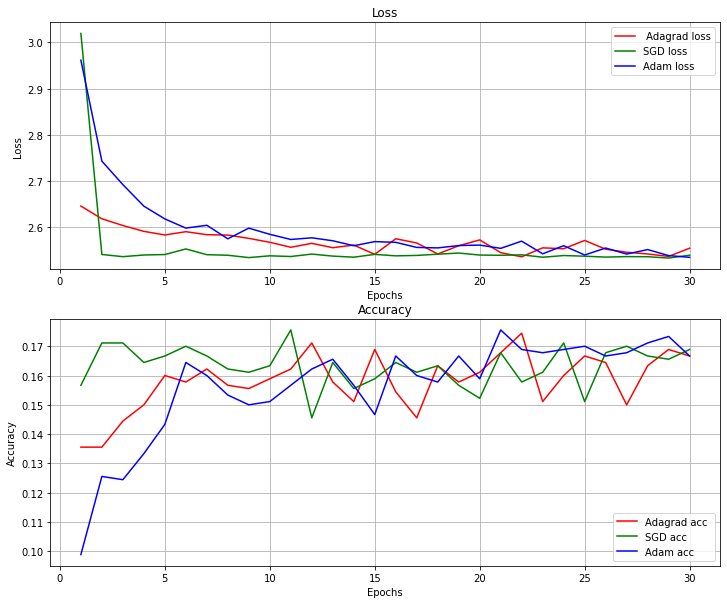

In [ ]:
'''
#@title graph of loss and  accuracy{ form-width: "200px" }
'''
fig = plt.figure(figsize=(12, 10))
fig.tight_layout()
'''
# ‘b’ 	blue
# ‘g’ 	green
# ‘r’ 	red
# ‘c’ 	cyan
# ‘m’ 	magenta
# ‘y’ 	yellow
# ‘k’ 	black
# ‘w’ 	white
#  optimizer comparation for aug train whole data 512
'''
plt.subplot(2, 1, 1)

plt.plot(epochs1, loss1, 'r', label=' Adagrad loss')
plt.plot(epochs2, loss2, 'g', label='SGD loss')
plt.plot(epochs3, loss3, 'b', label='Adam loss')

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(epochs1, acc1, 'r', label='Adagrad acc ')
plt.plot(epochs2, acc2, 'g', label='SGD acc ')
plt.plot(epochs3, acc3, 'b', label='Adam acc ')


plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lowe right')
plt.grid()

